<h1>Goal -<h3> To find attrition rate given important features of an employee. Attrition rate defines the value of employee to the company.


As the attrition rate are numerical variables, so it can be regression problem.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt  
from scipy import stats
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
import statsmodels.api as sm
import pylab
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn import preprocessing
from sklearn.svm import SVR
import skopt
from sklearn.model_selection import RepeatedStratifiedKFold
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import median_absolute_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
import lightgbm as lgb
from sklearn.tree import export_graphviz
from IPython.display import display, Image
import pydotplus
from glob import glob
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from sklearn.ensemble import VotingRegressor

Using TensorFlow backend.


In [2]:
#Import the package import wandb from wandb.keras import WandbCallback#Initialize the W&B object wandb.init(project="tester")#Link the model with W&B’s tracking metrics model.fit(X_train, y_train, validationData=(X_test, y_test) epochs=config.epochs, callbacks=[WandbCallback()])model.save(os.path.join(wandb.run.dir, "model.h5"))

In [3]:
df = pd.read_csv(r'C:\Users\admin\Desktop\data science learning\7. Projects\attrision rate\data\Train.csv')
df_test = pd.read_csv(r'C:\Users\admin\Desktop\data science learning\7. Projects\attrision rate\data\Test.csv')

In [4]:
df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
Employee_ID                  7000 non-null object
Gender                       7000 non-null object
Age                          6588 non-null float64
Education_Level              7000 non-null int64
Relationship_Status          7000 non-null object
Hometown                     7000 non-null object
Unit                         7000 non-null object
Decision_skill_possess       7000 non-null object
Time_of_service              6856 non-null float64
Time_since_promotion         7000 non-null int64
growth_rate                  7000 non-null int64
Travel_Rate                  7000 non-null int64
Post_Level                   7000 non-null int64
Pay_Scale                    6991 non-null float64
Compensation_and_Benefits    7000 non-null object
Work_Life_balance            6989 non-null float64
VAR1                         7000 non-null int64
VAR2                         6423 non-null fl

In [6]:
df.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [7]:
del df['Employee_ID']

In [8]:
#Seperating numerical and categorical data
cols = df.columns
num_cols = df._get_numeric_data().columns
categorical_list = list(set(cols) - set(num_cols))
categ_df = df[categorical_list]
categ_df.head()

,Gender,Decision_skill_possess,Relationship_Status,Unit,Hometown,Compensation_and_Benefits
0,F,Conceptual,Married,IT,Franklin,type2
1,M,Analytical,Single,Logistics,Springfield,type2
2,F,Conceptual,Married,Quality,Clinton,type2
3,F,Behavioral,Single,Human Resource Management,Lebanon,type2
4,F,Conceptual,Married,Logistics,Springfield,type3


<h3>1. Performing EDA

In [9]:
num_df = df[num_cols]

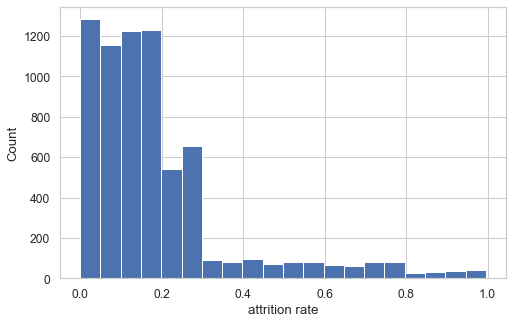

In [10]:
# Counting the variation of our target feature attrition rate
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(df['Attrition_rate'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}).set(xlabel='attrition rate', ylabel='Count');

Most of the values are around 0.1 to 0.3.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027188233390>,
      dtype=object)

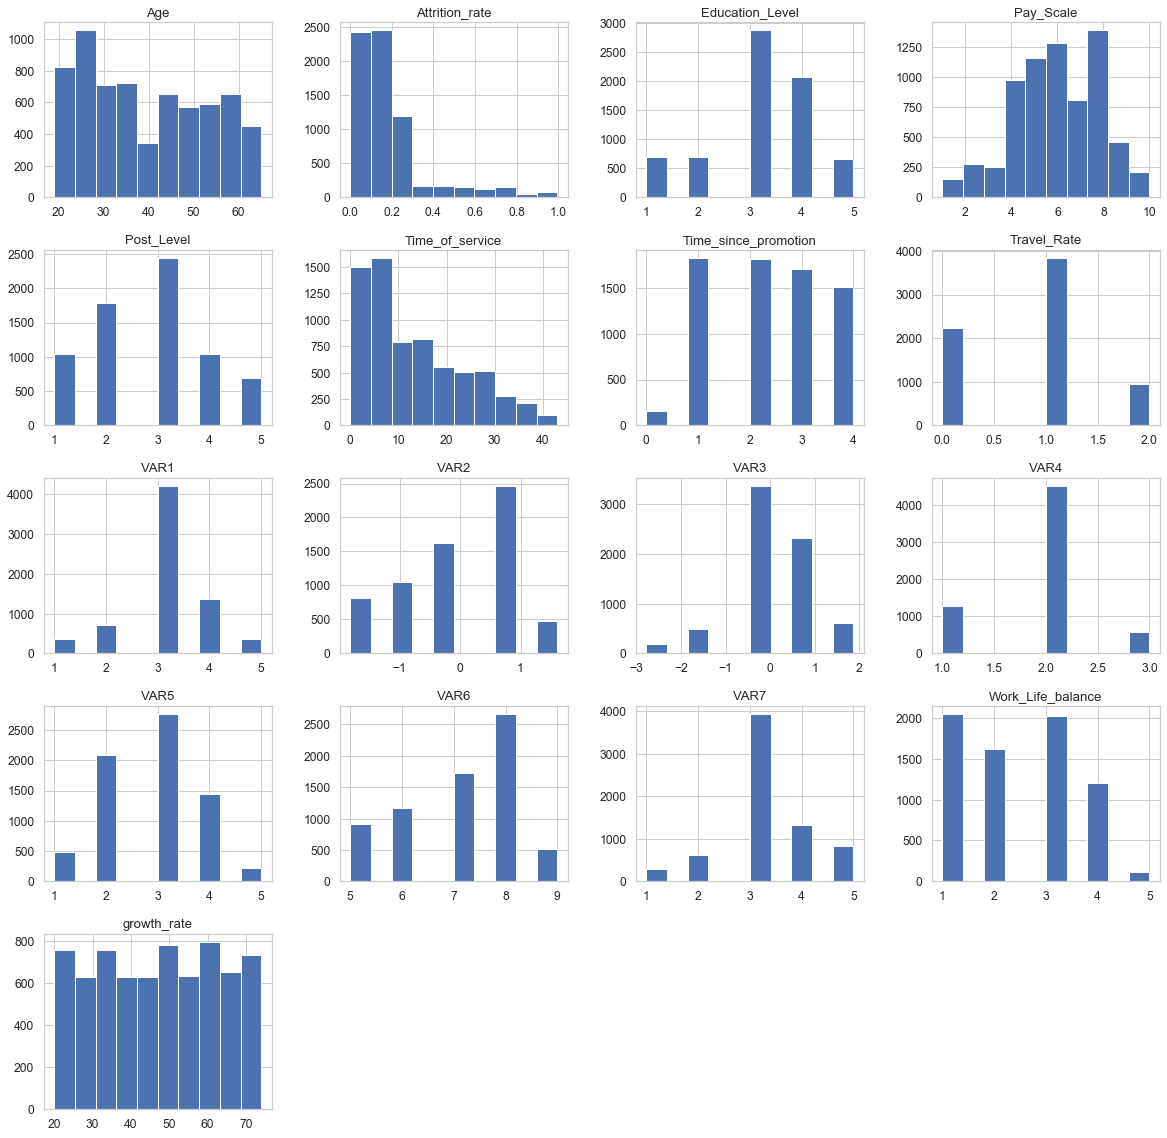

In [11]:
# Creating histograms for numerical data
num_df.hist(bins=10 ,figsize=(20,20))

C:\Python\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Python\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


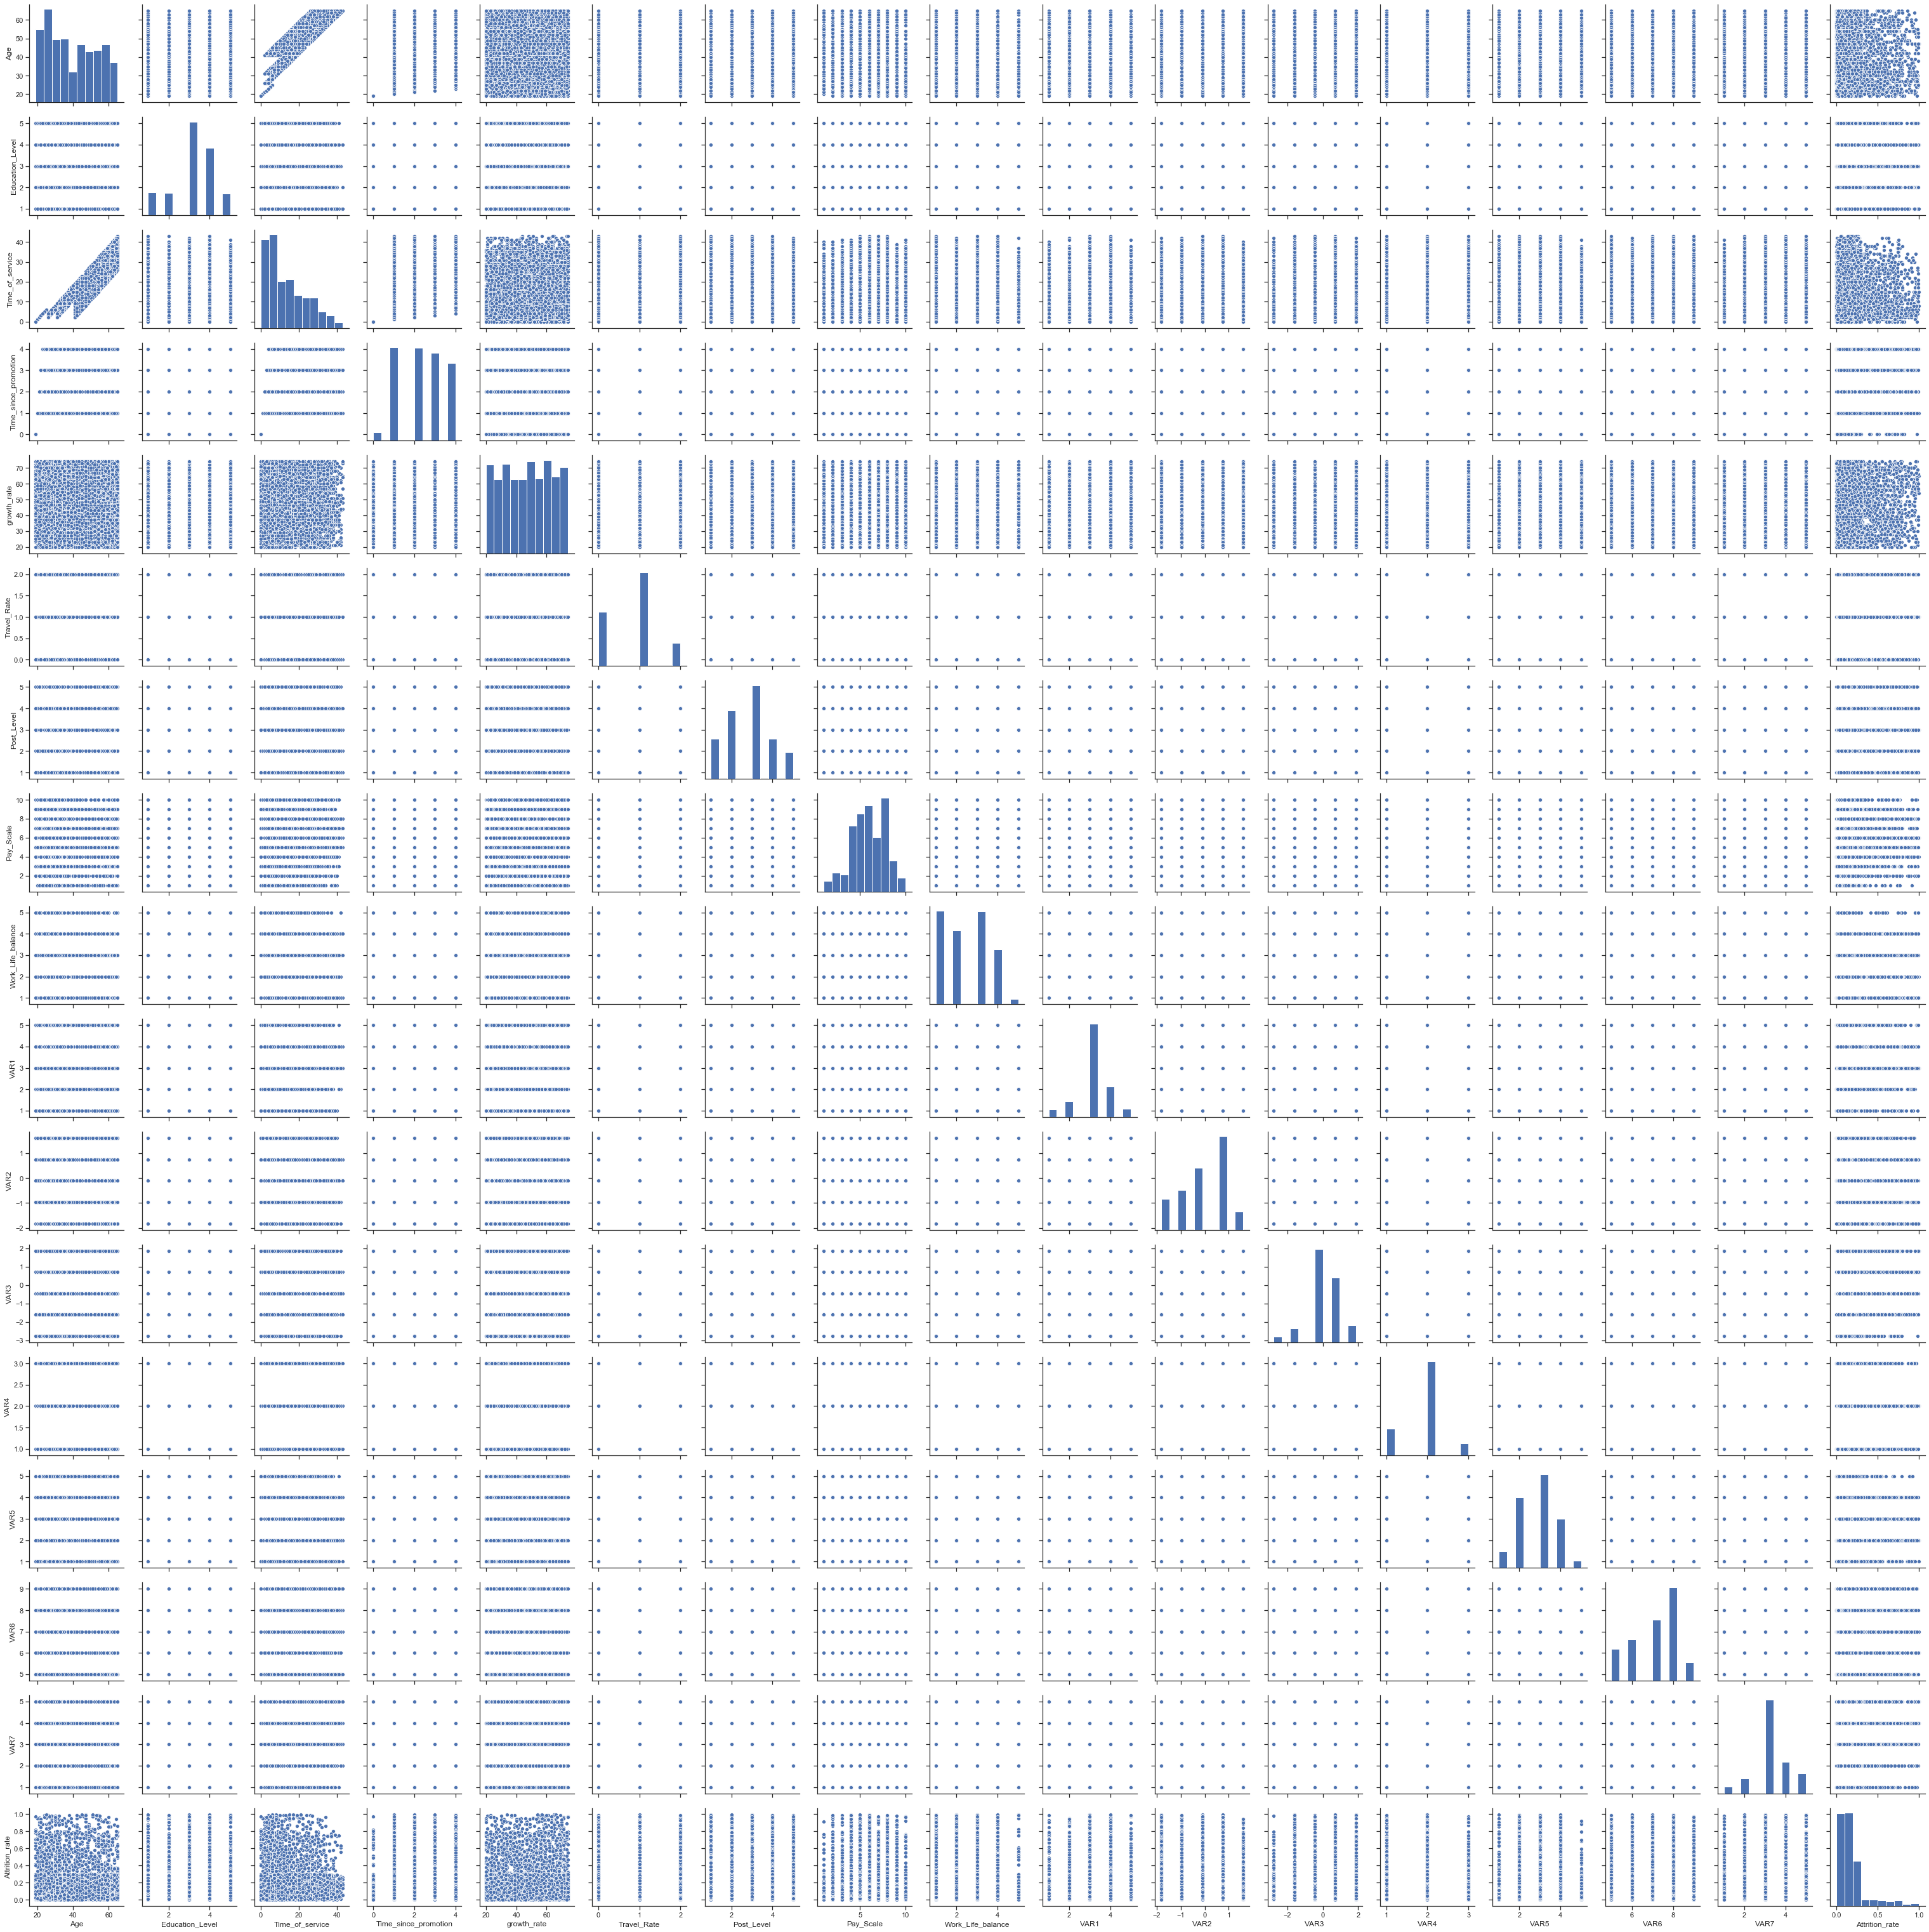

In [12]:
#for underlying distribution of numerical features plotting pairplots
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(num_df, height=2.5)
g

Conclusions -
1. age and time of service show linear relation ship for obivious reasons
2. suprisingly growth rate seem to be equal accross all ages.
3. time of service is equal to all the stages of growth rate.
4. age and attrision rate is same for all ages reflecting good environments for freshers too, the same conculsion goes for time of servise and growth rate 

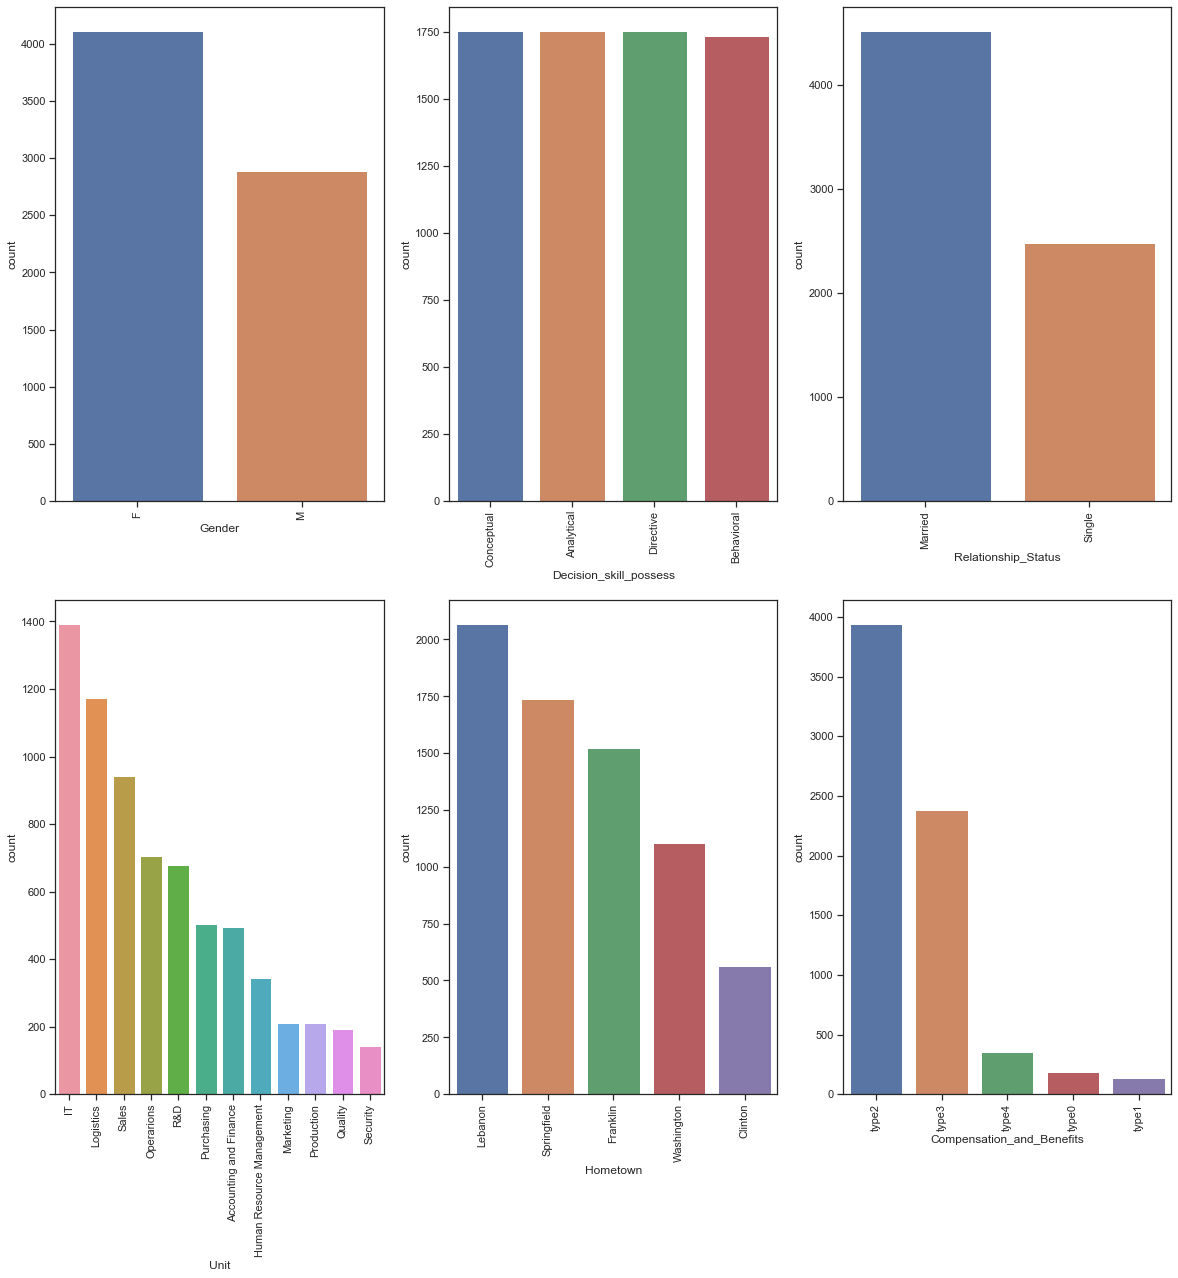

In [13]:
# PLotting countplots for categorical variables to gain insights of each classes
fig, ax = plt.subplots(2, 3, figsize=(20, 20))
for variable, subplot in zip(categ_df, ax.flatten()):
    sns.countplot(categ_df[variable], ax=subplot,order = categ_df[variable].value_counts().index)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

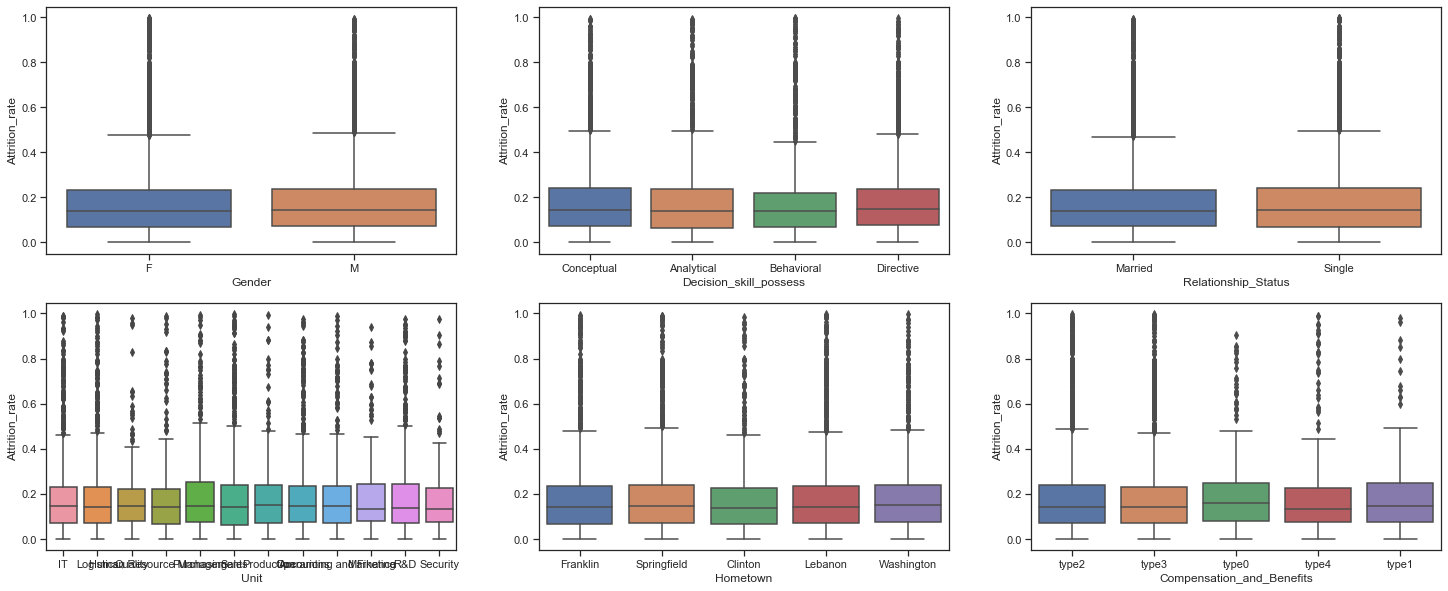

In [14]:
# Plotting box plots for categorical variables to see the distribution of data points 
fig, ax = plt.subplots(2, 3, figsize=(25, 10))
for var, subplot in zip(categ_df, ax.flatten()):
    sns.boxplot(x=var, y=num_df['Attrition_rate'], data=categ_df, ax=subplot)

conclusions -
1. For unit feature some of classes have not so dense distribution.
2. for featureature compensation and benifits classes type 0,4 and 1 have not so dense distribution
3. all other features have dense distribution for there classes.

In [15]:
#using pivot tables 
pd.pivot_table(df, index = ['Gender','Relationship_Status'], values = 'Age')

Age
Gender Relationship_Status           
F      Married              39.619595
       Single               39.567865
M      Married              39.680716
       Single               39.604938

average age of both male and female is around 39 to 40 years, even after being married

1. unit feature related pivot plots

In [16]:
pd.pivot_table(df, index = ['Unit','Gender'], values = 'Age').sort_values('Age', ascending = False)

,,Age
Unit,Gender,
Marketing,F,42.352459
Sales,F,40.324272
Logistics,M,40.106157
Marketing,M,40.093333
Operarions,M,40.070111
Human Resource Management,F,40.057971
IT,M,39.992895
R&D,M,39.902041
Purchasing,M,39.729592


conclusion -
1. On average male's age is 1 or 2 years greater than females accross every domain

In [17]:
pd.pivot_table(df, index = ['Unit'], values = 'Pay_Scale').sort_values('Pay_Scale', ascending = False)

,Pay_Scale
Unit,
Quality,6.170984
Operarions,6.085227
Purchasing,6.081349
Marketing,6.075472
Human Resource Management,6.072674
Accounting and Finance,6.042339
Production,5.990521
Sales,5.979809
Logistics,5.979470


In [18]:
pd.pivot_table(df, index = ['Unit'], values = 'growth_rate').sort_values('growth_rate', ascending = False)

,growth_rate
Unit,
Security,48.326389
Human Resource Management,48.313953
Purchasing,48.136905
Accounting and Finance,47.798387
R&D,47.745588
Operarions,47.303116
Marketing,47.301887
Sales,46.722163
Logistics,46.634271


In [19]:
pd.pivot_table(df, index = ['Unit'], values = 'Education_Level').sort_values('Education_Level', ascending = False)

,Education_Level
Unit,
Accounting and Finance,3.270161
Security,3.250000
Operarions,3.245042
Quality,3.243523
Human Resource Management,3.235465
Sales,3.195122
Marketing,3.193396
Purchasing,3.188492
Production,3.180095


In [20]:
pd.pivot_table(df, index = ['Unit'], values = 'Work_Life_balance').sort_values('Work_Life_balance', ascending = False)

,Work_Life_balance
Unit,
Security,2.527778
Accounting and Finance,2.458586
Marketing,2.438679
IT,2.418103
Sales,2.412951
Purchasing,2.396000
Logistics,2.389411
Production,2.347619
Operarions,2.345609


In [21]:
pd.pivot_table(df, index = ['Unit'], values = 'Attrition_rate').sort_values('Attrition_rate', ascending = False)

,Attrition_rate
Unit,
Purchasing,0.199565
Operarions,0.197777
R&D,0.197229
Sales,0.193043
Marketing,0.191922
Security,0.190892
Production,0.190742
Accounting and Finance,0.187362
Quality,0.185676


2. home town focused pivot table

In [22]:
pd.pivot_table(df, index = ['Hometown'], values = 'Pay_Scale').sort_values('Pay_Scale', ascending = False)

,Pay_Scale
Hometown,
Springfield,6.064553
Clinton,6.044405
Franklin,6.009211
Lebanon,5.987911
Washington,5.925792


In [23]:
pd.pivot_table(df, index = ['Hometown'], values = 'growth_rate').sort_values('growth_rate', ascending = False)

,growth_rate
Hometown,
Washington,47.906872
Clinton,47.334513
Springfield,47.099654
Franklin,47.018385
Lebanon,46.544444


In [24]:
pd.pivot_table(df, index = ['Hometown'], values = 'Attrition_rate').sort_values('Attrition_rate', ascending = False)

,Attrition_rate
Hometown,
Springfield,0.194084
Washington,0.188895
Clinton,0.188464
Franklin,0.187901
Lebanon,0.187019


In [25]:
pd.pivot_table(df, index = ['Hometown'], values = 'Education_Level').sort_values('Education_Level', ascending = False)

,Education_Level
Hometown,
Lebanon,3.215459
Franklin,3.187131
Washington,3.179024
Springfield,3.168203
Clinton,3.166372


3. decision skills focus pivot tables

In [26]:
pd.pivot_table(df, index = ['Decision_skill_possess'], values = 'Education_Level').sort_values('Education_Level', ascending = False)

,Education_Level
Decision_skill_possess,
Analytical,3.217094
Behavioral,3.195853
Directive,3.181974
Conceptual,3.156606


3. Decision skill posses feature focused pivot tables

In [27]:
pd.pivot_table(df, index = ['Decision_skill_possess'], values = 'Pay_Scale').sort_values('Pay_Scale', ascending = False)

,Pay_Scale
Decision_skill_possess,
Behavioral,6.047839
Directive,6.033200
Conceptual,5.977778
Analytical,5.966933


In [28]:
pd.pivot_table(df, index = ['Decision_skill_possess'], values = 'growth_rate').sort_values('growth_rate', ascending = False)

,growth_rate
Decision_skill_possess,
Directive,47.333714
Conceptual,47.175399
Analytical,47.156125
Behavioral,46.586982


In [29]:
pd.pivot_table(df, index = ['Decision_skill_possess'], values = 'Attrition_rate').sort_values('Attrition_rate', ascending = False)

,Attrition_rate
Decision_skill_possess,
Conceptual,0.194694
Directive,0.193772
Analytical,0.188470
Behavioral,0.180474


In [30]:
pd.pivot_table(df, index = ['Decision_skill_possess'], values = 'Age').sort_values('Age', ascending = False)

,Age
Decision_skill_possess,
Behavioral,39.969828
Directive,39.887545
Conceptual,39.746513
Analytical,38.897050


In [31]:
pd.pivot_table(df, index = ['Compensation_and_Benefits'], values = 'Education_Level').sort_values('Education_Level', ascending = False)

,Education_Level
Compensation_and_Benefits,
type1,3.255639
type4,3.243626
type2,3.195184
type3,3.174223
type0,3.053476


<h4> 3. checking multicollinearity

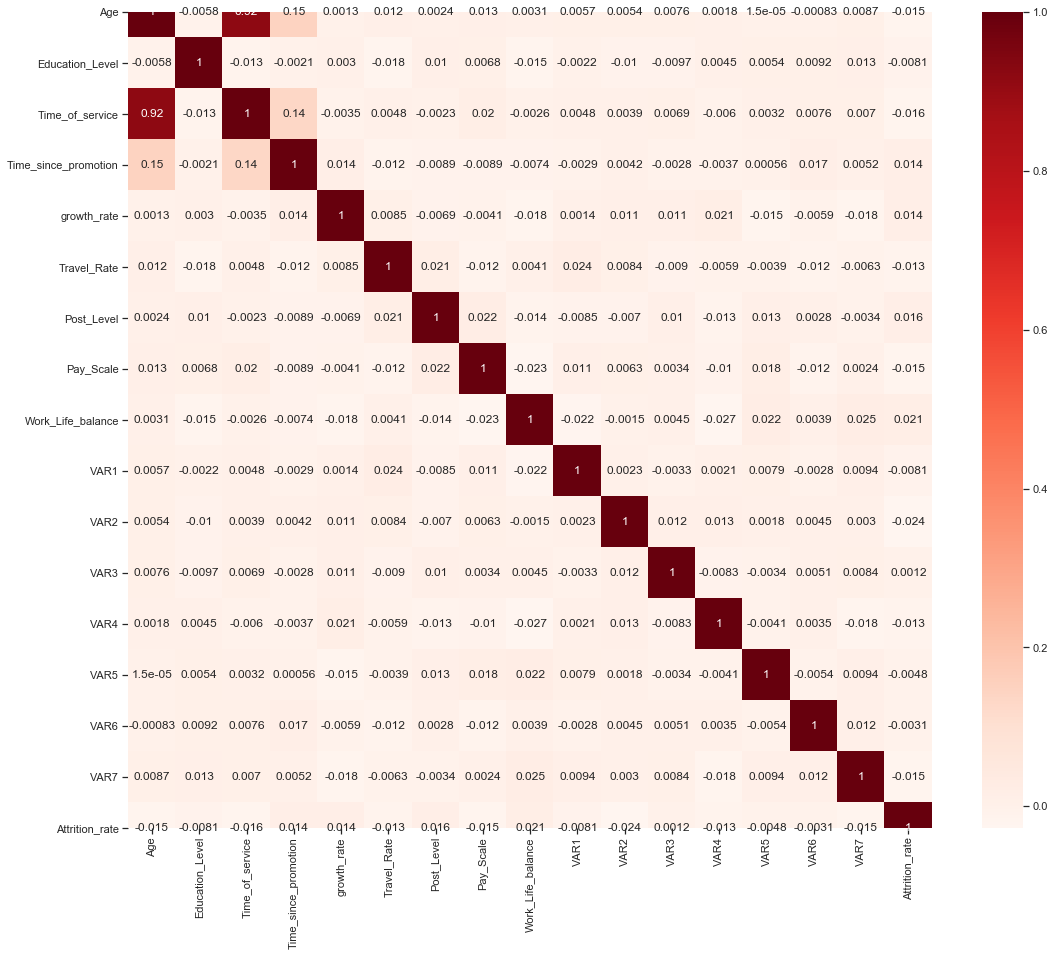

<Figure size 576x360 with 0 Axes>

In [32]:
plt.figure(figsize=(18,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.savefig("main_correlation.png")

Conclusions -
1. As age increase, time of service increases.
2. As age increase, time since promotion also increases.
3. As time of service increased, time since promotion also increases, denoting lesser growth rate as a person becomes senior

<h3>2. Data cleaning </h3>

<h4>2.1. First dealing with numerical data

In [33]:
# checking whether data is symmetrical to confirm gaussian distribution
df.skew()

Age                     0.243487
Education_Level        -0.404064
Time_of_service         0.800375
Time_since_promotion    0.009156
growth_rate            -0.016069
Travel_Rate             0.196371
Post_Level              0.214527
Pay_Scale              -0.259976
Work_Life_balance       0.194342
VAR1                   -0.161837
VAR2                   -0.428420
VAR3                   -0.233782
VAR4                   -0.108307
VAR5                    0.062702
VAR6                   -0.408880
VAR7                    0.068159
Attrition_rate          2.056876
dtype: float64

Conclusion -
data has almost no skewness

In [34]:
#filling missing data with median of each column
df.fillna(df.median()).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 23 columns):
Gender                       7000 non-null object
Age                          7000 non-null float64
Education_Level              7000 non-null int64
Relationship_Status          7000 non-null object
Hometown                     7000 non-null object
Unit                         7000 non-null object
Decision_skill_possess       7000 non-null object
Time_of_service              7000 non-null float64
Time_since_promotion         7000 non-null int64
growth_rate                  7000 non-null int64
Travel_Rate                  7000 non-null int64
Post_Level                   7000 non-null int64
Pay_Scale                    7000 non-null float64
Compensation_and_Benefits    7000 non-null object
Work_Life_balance            7000 non-null float64
VAR1                         7000 non-null int64
VAR2                         7000 non-null float64
VAR3                         7000 non-null f

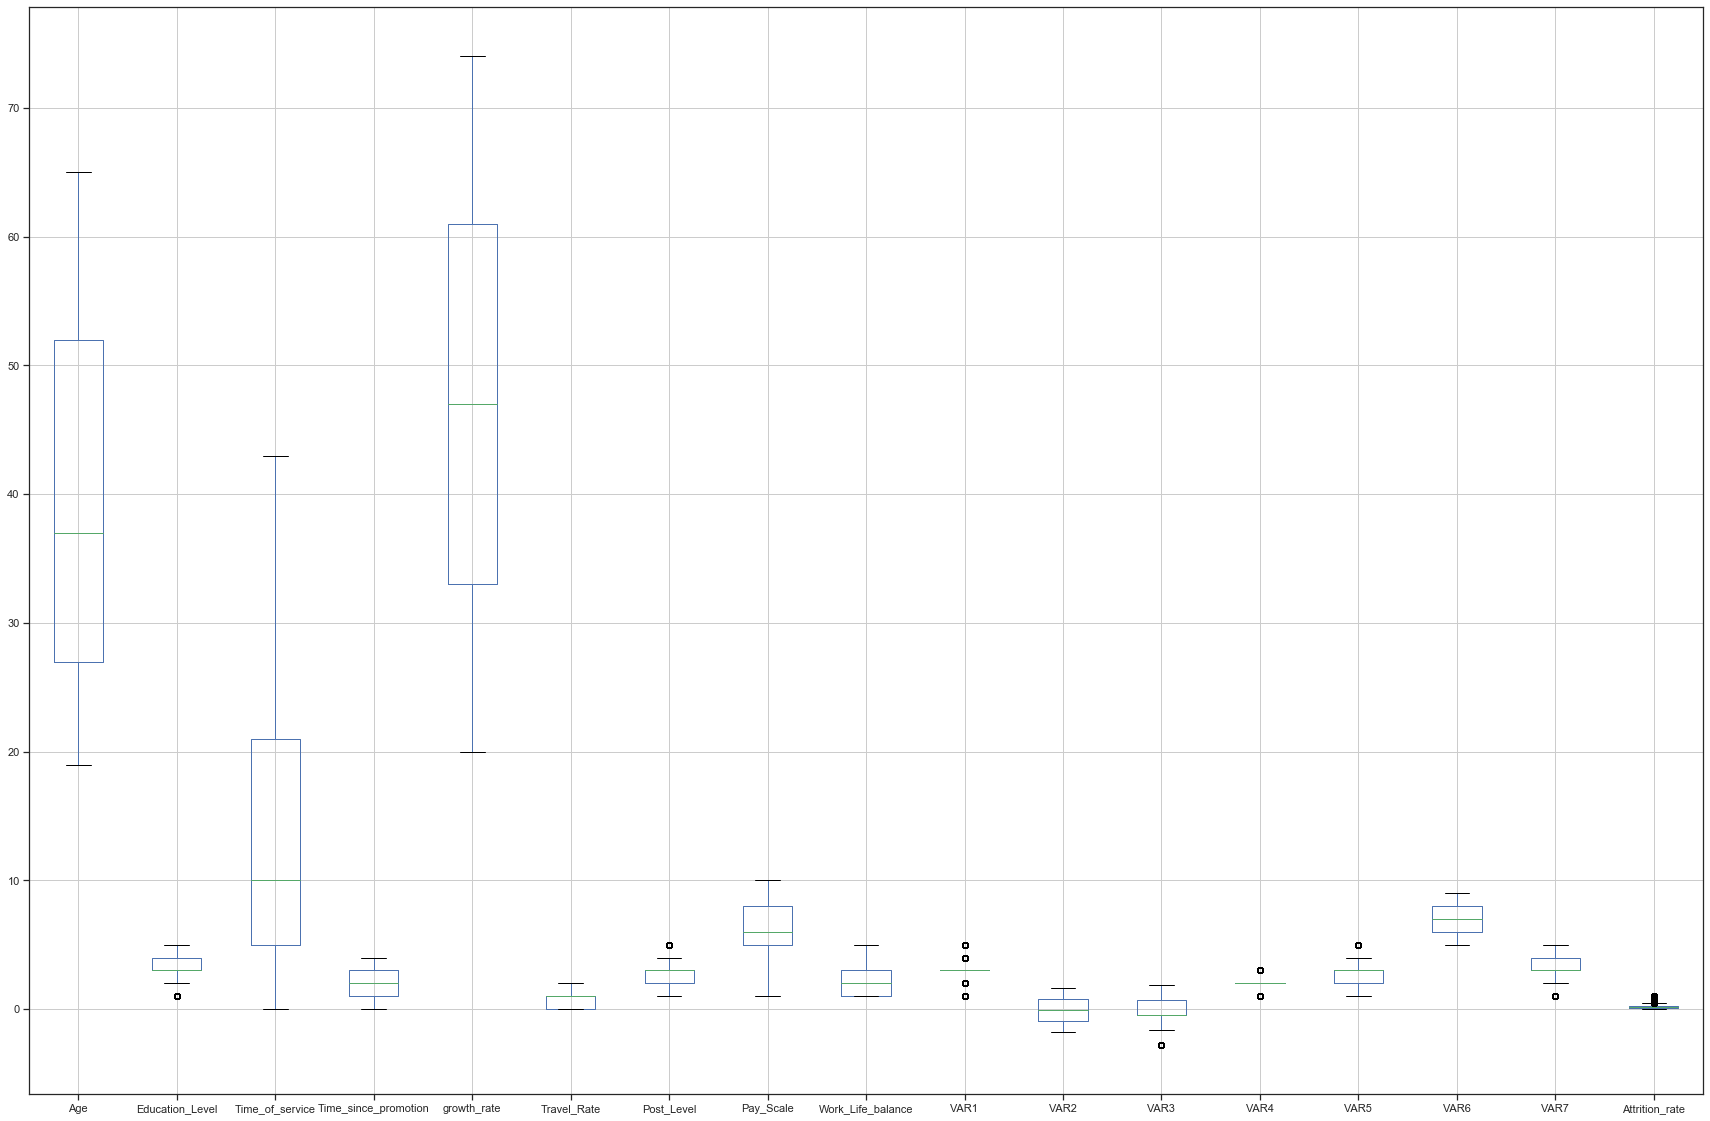

In [35]:
#checking for outliers
boxplot = df.boxplot(figsize=(30,20))

In [36]:
#filling missing values in numerical dataframe
num_df_mi = pd.DataFrame(num_df.fillna(num_df.median()))
num_df_mi.shape

(7000, 17)

In [37]:
#removing the outliers using Isolation Forest automatic outlier detection technique
iso = IsolationForest(contamination=0.01)
yhat = iso.fit_predict(num_df_mi)
mask = yhat != -1
num_df_outlr = num_df_mi.iloc[mask, :]
num_df_outlr.shape

(6930, 17)

In [38]:
yout = num_df_outlr['Attrition_rate']

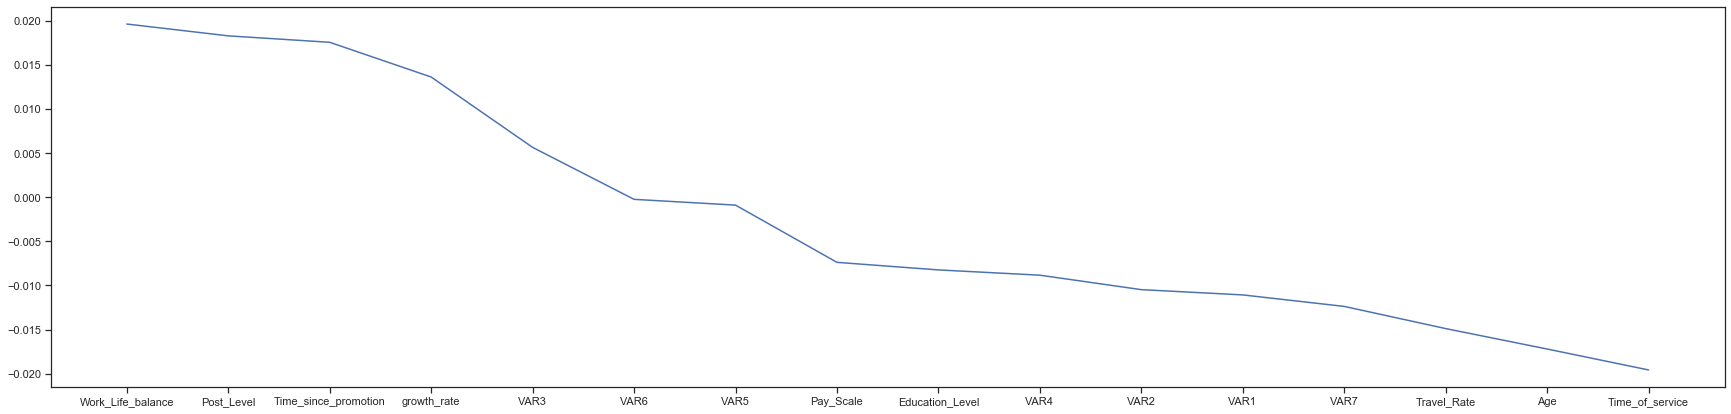

In [39]:
# PLotting correlation of each independent feature with dependent.
num_d = num_df_outlr.drop("Attrition_rate", axis=1).corrwith(yout).sort_values(ascending=False)
xx = num_d.index
yy = num_d.values
plt.figure(figsize = (30,7))
plt.plot(xx, yy)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002719A35E7F0>,
      dtype=object)

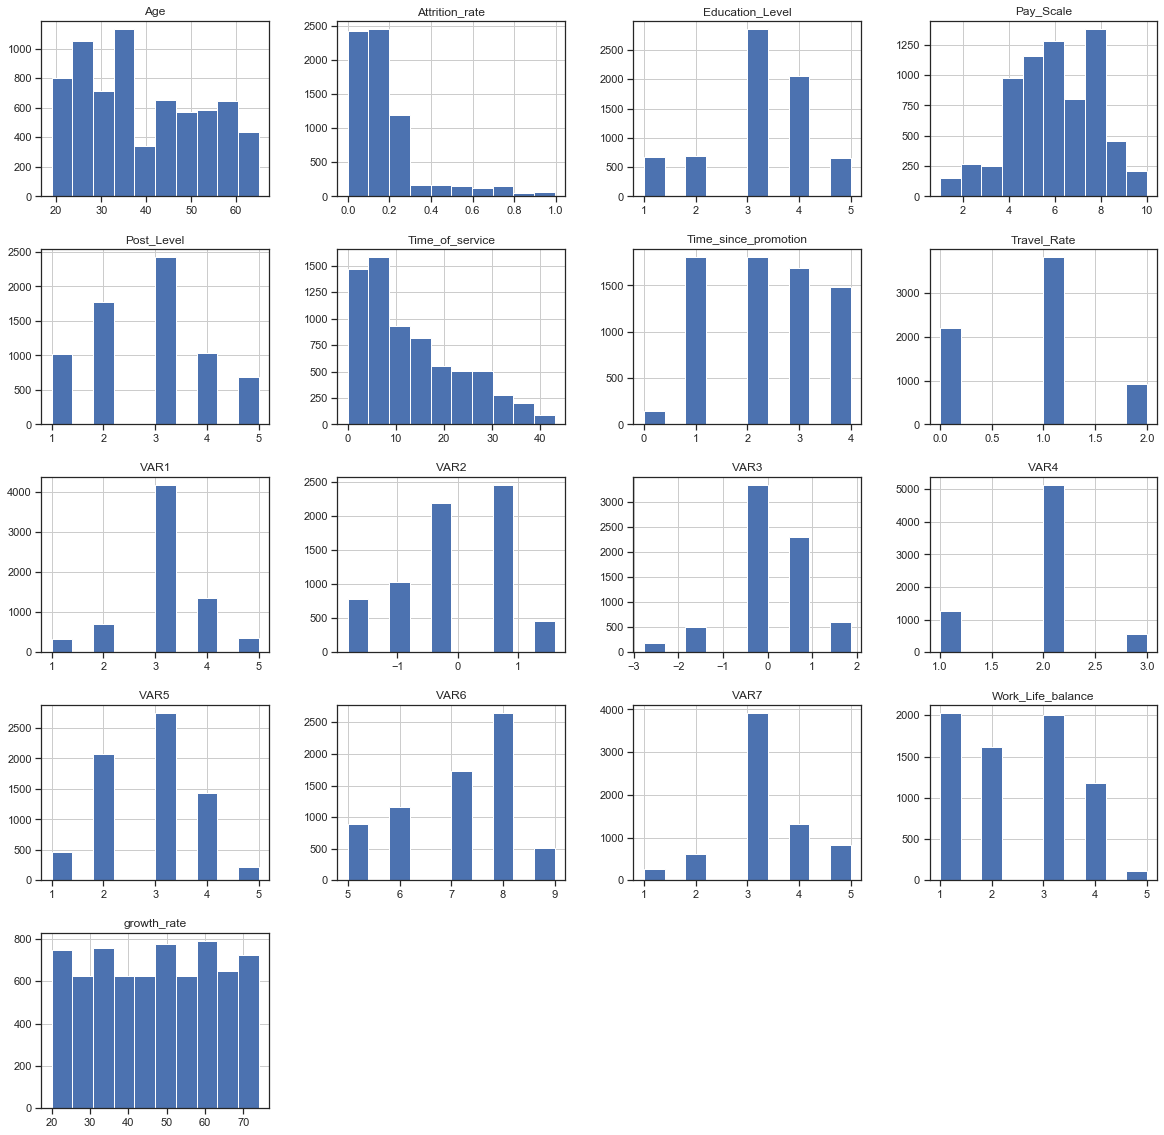

In [40]:
# checking numerical features after outlier removal
num_df_outlr.hist(bins=10 ,figsize=(20,20))

Q-Q plot of age


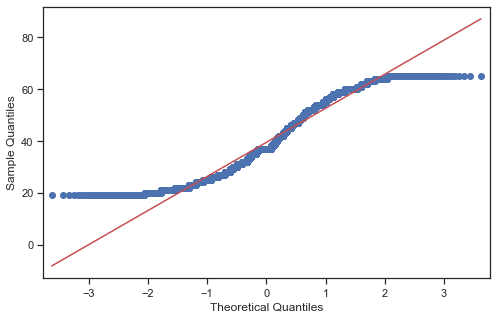

In [41]:
#running Q-Q plot test to check wether the numerical features are gaussian
print('Q-Q plot of age')
sm.qqplot(num_df_outlr['Age'], loc = 39.428716, scale = 13.160023, line='s')
pylab.show()

Q-Q plot of growth_rate


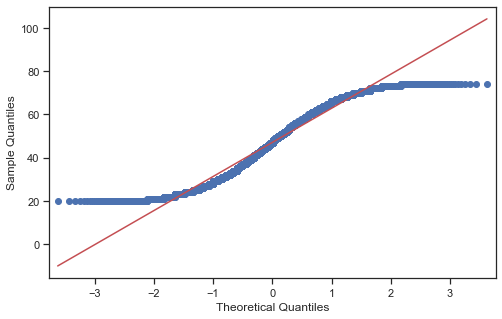

In [42]:
print('Q-Q plot of growth_rate')
sm.qqplot(num_df_outlr['growth_rate'], loc =  47.080231, scale = 15.756607, line='s')
pylab.show()

Q-Q plot of VAR2


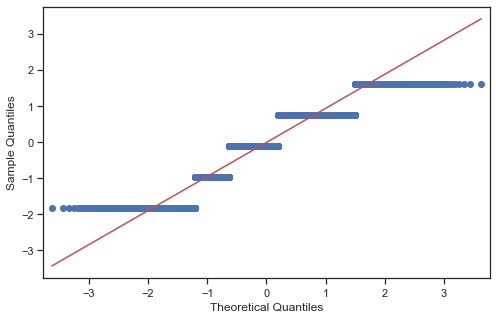

In [43]:
print('Q-Q plot of VAR2')
sm.qqplot(num_df_outlr['VAR2'], loc =  -0.011986, scale = 0.943596, line='s')
pylab.show()

Q-Q plot of Time_of_service


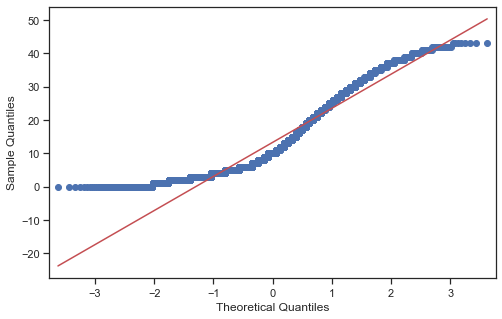

In [44]:
print('Q-Q plot of Time_of_service')
sm.qqplot(num_df_outlr['Time_of_service'], loc = 13.281385, scale = 10.208020, line='s')
pylab.show()

Conclusions for Q-Q plots
As from above three plots we can see that the features are not gaussian distributed, therefore using min max scalar

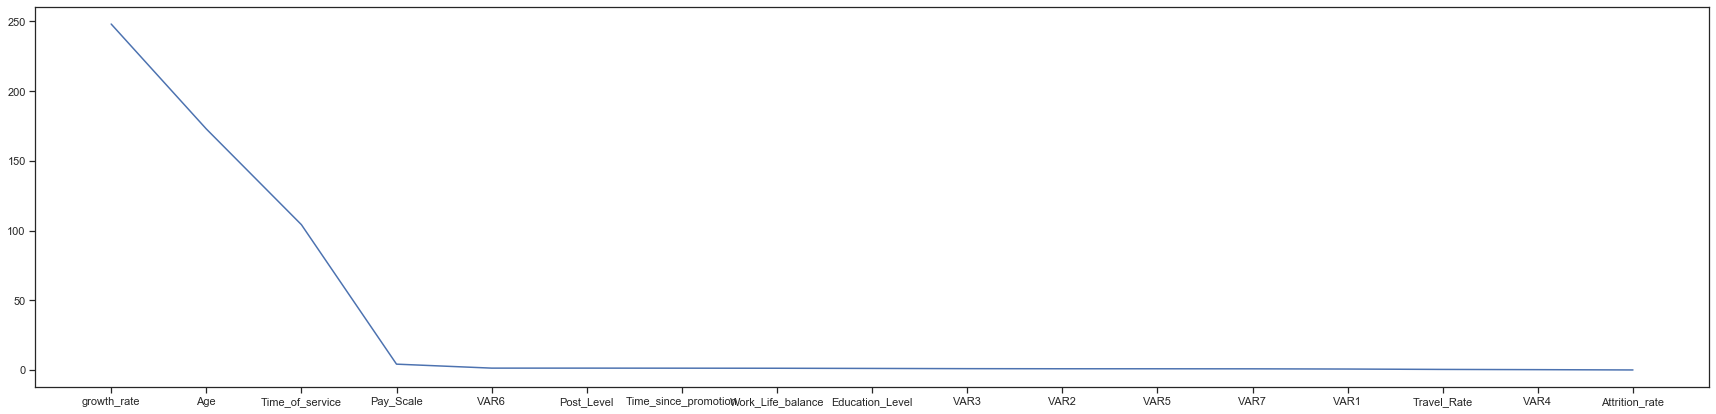

In [45]:
# Variance of individual features for checking contribution to model
data_va = num_df_outlr.var(axis= 0)
data_vas = data_va.sort_values(ascending=False)
data_va = num_df_outlr.var(axis= 0)
data_vas = data_va.sort_values(ascending=False)
y = data_vas.values 
x = data_vas.index
plt.figure(figsize = (30,7))
plt.plot(x, y)
plt.show()

Conclusion -
1. We see this flat line because of discrete data, and growth rate, age, time of service has continous data which contributed to larger variance.But we are going to consider these all features as dimentionality will get too low to offer any kind of meaningfull information to model.

In [46]:
num_df_outlr.shape

(6930, 17)

In [47]:
corrmatrix = num_df_outlr.corr()

In [48]:
# Checking wether features gets remove due to high correlation with each other
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if ((corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return dataset

In [49]:
correlation(num_df_outlr, 0.75).shape

(6930, 16)

Conclusion -
Turns out even after trying to excluding features having high correlation none of the features are eliminated

In [50]:
num_df_ou = num_df_outlr.drop("Attrition_rate", axis=1)
norm = MinMaxScaler().fit(num_df_ou)
num_df_norm = pd.DataFrame(norm.transform(num_df_ou))
num_df_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.500000,0.75,1.00,0.240741,0.5,0.00,0.666667,0.50,0.75,0.749978,1.0,0.5,0.75,0.00,0.50
1,0.108696,0.50,1.00,0.296296,0.0,0.50,0.555556,0.75,0.50,0.249993,0.5,0.5,0.50,0.00,0.50
2,0.847826,0.50,0.75,0.574074,0.0,0.25,0.777778,0.00,0.75,0.249993,0.5,1.0,0.50,0.75,0.50
3,0.152174,0.50,0.75,0.666667,0.5,0.50,0.777778,0.00,0.50,0.000000,0.5,0.5,0.50,0.50,0.50
4,0.260870,0.00,1.00,0.777778,0.5,0.50,0.111111,0.50,0.00,0.749978,0.5,0.5,0.25,0.75,0.25


In [51]:
num_df_norm.columns = ['Age', 'Education_Level', 'Time_since_promotion', 'growth_rate',
       'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Work_Life_balance', 'VAR1',
       'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7']

<h4> 2.2 Cleaning categorical data

In [52]:
numindex = num_df_norm.index
cate_df  = categ_df[categ_df.index.isin(numindex)]
cate_df .columns

Index(['Gender', 'Decision_skill_possess', 'Relationship_Status', 'Unit',
       'Hometown', 'Compensation_and_Benefits'],
      dtype='object')

In [53]:
# Target encoding for categorical features
encoder=ce.TargetEncoder() 
cate_df_encoded = encoder.fit_transform(cate_df,num_df_outlr['Attrition_rate'])

In [54]:
# putting together category and numerical features together after cleaning
Xx = pd.concat([cate_df_encoded, num_df_norm], axis = 1)
Yy = num_df_outlr['Attrition_rate']
Xx.head() 

,Gender,Decision_skill_possess,Relationship_Status,Unit,Hometown,Compensation_and_Benefits,Age,Education_Level,Time_since_promotion,growth_rate,...,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,0.182321,0.189818,0.185033,0.180174,0.185447,0.187359,0.500000,0.75,1.00,0.240741,...,0.00,0.666667,0.50,0.75,0.749978,1.0,0.5,0.75,0.00,0.50
1,0.191930,0.185526,0.188559,0.181236,0.190401,0.187359,0.108696,0.50,1.00,0.296296,...,0.50,0.555556,0.75,0.50,0.249993,0.5,0.5,0.50,0.00,0.50
2,0.182321,0.189818,0.185033,0.178271,0.185641,0.187359,0.847826,0.50,0.75,0.574074,...,0.25,0.777778,0.00,0.75,0.249993,0.5,1.0,0.50,0.75,0.50
3,0.182321,0.177316,0.188559,0.180198,0.185052,0.187359,0.152174,0.50,0.75,0.666667,...,0.50,0.777778,0.00,0.50,0.000000,0.5,0.5,0.50,0.50,0.50
4,0.182321,0.189818,0.185033,0.181236,0.190401,0.182215,0.260870,0.00,1.00,0.777778,...,0.50,0.111111,0.50,0.00,0.749978,0.5,0.5,0.25,0.75,0.25


In [55]:
# Splitting the train data into train and test as test data set provided on kaggle dosent contain target variable
X_train, X_test, y_train, y_test = train_test_split(Xx, Yy , test_size=0.33, random_state=42)

<h3>3. Models Training

<h4>3.1 Applying linear regression -

In [56]:
scores = {}

In [58]:
# Fitting data on model and Checking error, score given by model
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict( X_test)
error = mean_squared_error(y_test, y_pred)
score = 100 * max(0, 1-error)
scores['linear regression'] = score 
print('error is-',error)
print('score is -',score)

error is- 0.03363912098163668
score is - 96.63608790183633


Feature-name: Gender, Score:-0.6397572803736206
--------------------------------------------------
Feature-name: Decision_skill_possess, Score:-0.573943750704944
--------------------------------------------------
Feature-name: Relationship_Status, Score:0.6019632987589699
--------------------------------------------------
Feature-name: Unit, Score:-0.7735477855327917
--------------------------------------------------
Feature-name: Hometown, Score:-0.3748763286910189
--------------------------------------------------
Feature-name: Compensation_and_Benefits, Score:-0.5815205528636312
--------------------------------------------------
Feature-name: Age, Score:-0.015918791474894427
--------------------------------------------------
Feature-name: Education_Level, Score:-0.017371279975912614
--------------------------------------------------
Feature-name: Time_since_promotion, Score:0.005976939320197063
--------------------------------------------------
Feature-name: growth_rate, Score:0.016

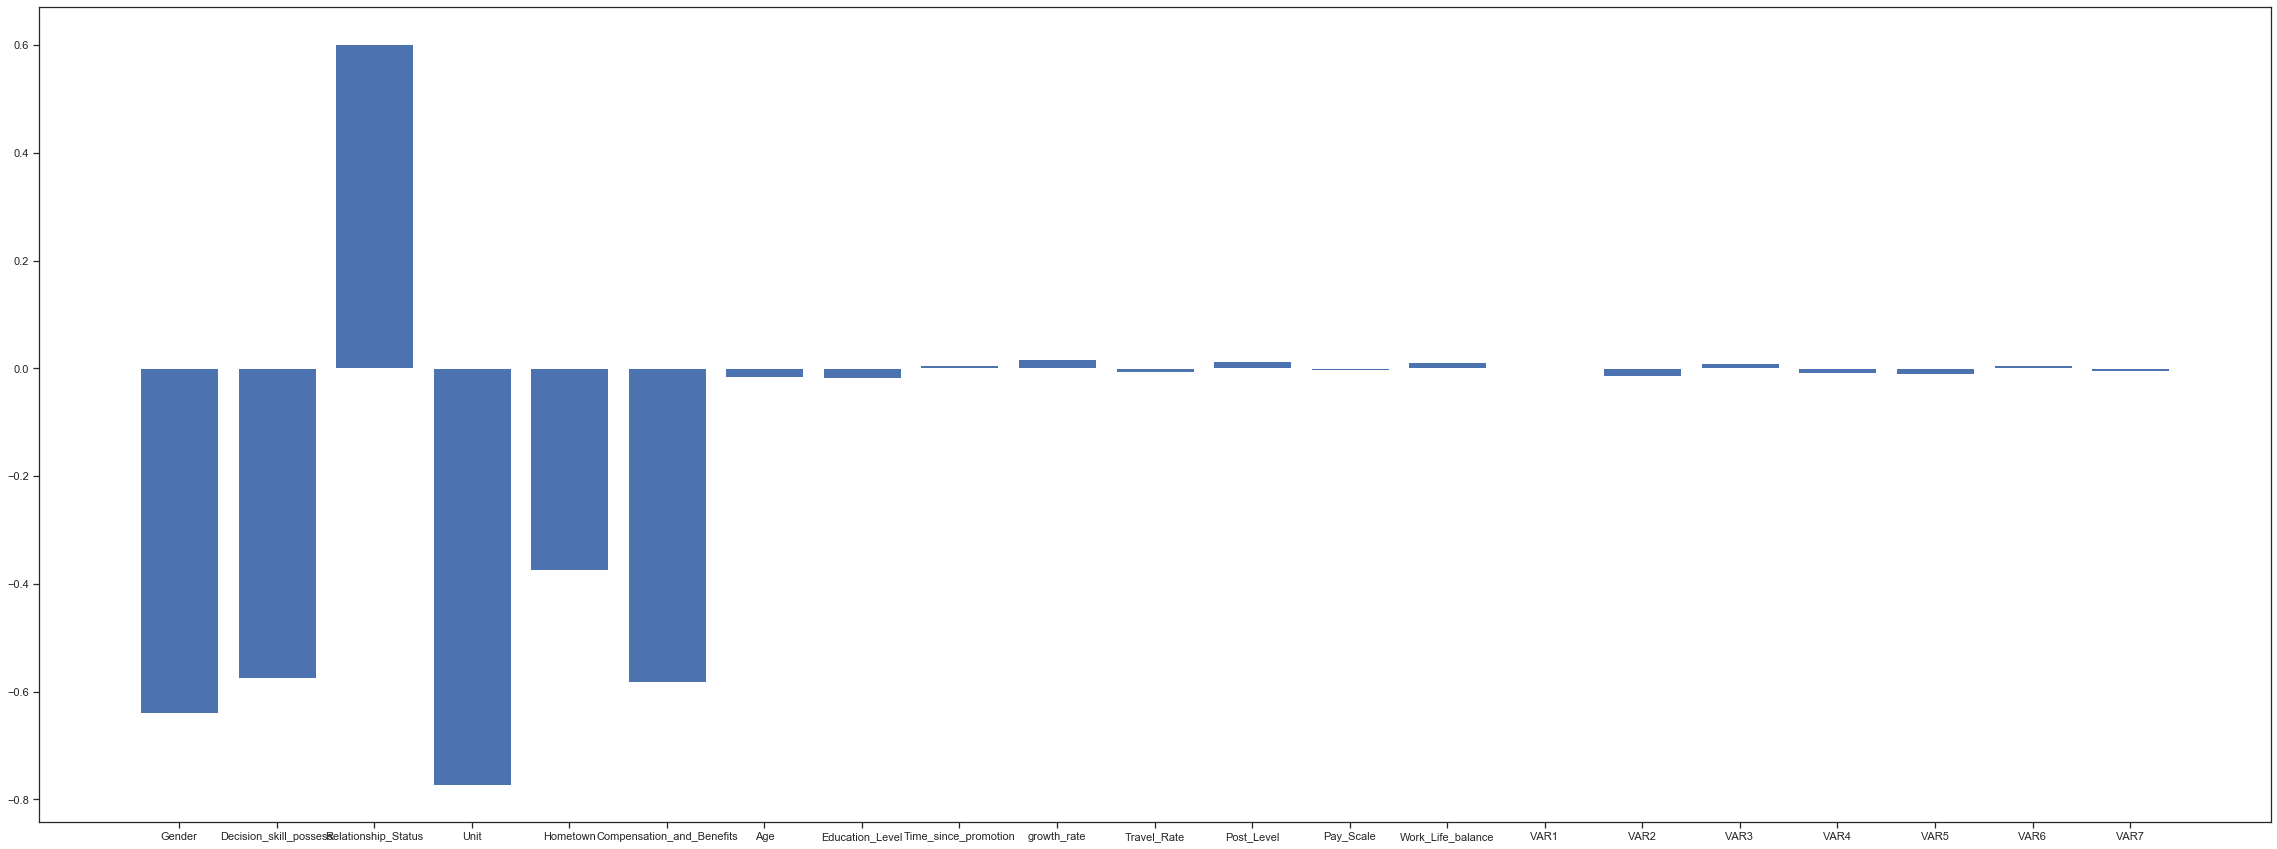

In [59]:
# Checking feature importance given by model
importance = reg.coef_
for i,v in enumerate(importance):
    print('Feature-name: {}, Score:{}'.format(X_train.columns[i],v))
    print('--------------------------------------------------')
# plot feature importance
plt.figure(figsize = (40,15))
plt.bar(X_train.columns, importance)
plt.show()

<h4>3.2 Applying support vector regressor

In [60]:
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':(1e-6, 100.0, 'log-uniform'),'gamma':[1e-6, 100.0, 'log-uniform'],'degree':[1,5]}
search = GridSearchCV( estimator=SVR(), param_grid=parameters, scoring = 'neg_median_absolute_error', n_jobs=-1, cv =3 )
search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': (1e-06, 100.0, 'log-uniform'), 'degree': [1, 5],
                         'gamma': [1e-06, 100.0, 'log-uniform'],
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             scoring='neg_median_absolute_error')

In [61]:
search.best_params_

{'C': 100.0, 'degree': 1, 'gamma': 100.0, 'kernel': 'poly'}

In [62]:
svr = SVR(kernel='poly', degree=1, gamma=100, coef0=0.0, tol=0.001, C=100, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
svr.fit(X_train,y_train)
ypred1 = svr.predict(X_test)

In [63]:
# Checking error and score given by model
error1 = mean_squared_error(y_test, ypred1)
score1 = 100 * max(0, 1-error1)
scores['SVR'] = score1
print('error for SVR is-',error1)
print('score for SVR is -',score1)

error for SVR is- 0.03467027656749403
score for SVR is - 96.5329723432506


<h4> 3.3 Applying decision tree regressor

<h4> 3.3 Applying random forests

In [64]:
def rfr_model( X, y):
    # Perform Grid-Search
    gsc = GridSearchCV(estimator=RandomForestRegressor(),param_grid={'max_depth': range(3,7),'n_estimators': (10, 50, 100, 1000),},cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
    scores = cross_val_score(rfr, X, y, cv=5, scoring='neg_mean_absolute_error')
    return best_params

In [65]:
rfr_model(X_train,y_train)

{'max_depth': 3, 'n_estimators': 100}

In [66]:
# Fitting data on model and Checking error, score given by model
rfr = RandomForestRegressor(max_depth= 3, n_estimators= 50 ,random_state=False, verbose=False)
rfr.fit(X_train,y_train)
ypred2 = rfr.predict(X_test)
error2 = mean_squared_error(y_test, ypred2)
score2 = 100 * max(0, 1-error2)
scores['Randomforest regressor'] = score2
print('error for random forest is-',error2)
print('score for random forest is -',score2)

error for random forest is- 0.033548159188073794
score for random forest is - 96.64518408119262


Feature-name: Gender, Score:0.008934839169655154
--------------------------------------------------
Feature-name: Decision_skill_possess, Score:0.05971862108604936
--------------------------------------------------
Feature-name: Relationship_Status, Score:0.008465302542553113
--------------------------------------------------
Feature-name: Unit, Score:0.1333156643926961
--------------------------------------------------
Feature-name: Hometown, Score:0.041263719923045436
--------------------------------------------------
Feature-name: Compensation_and_Benefits, Score:0.005905981890066068
--------------------------------------------------
Feature-name: Age, Score:0.1822948090583653
--------------------------------------------------
Feature-name: Education_Level, Score:0.047423164223911095
--------------------------------------------------
Feature-name: Time_since_promotion, Score:0.03291565391550368
--------------------------------------------------
Feature-name: growth_rate, Score:0.134

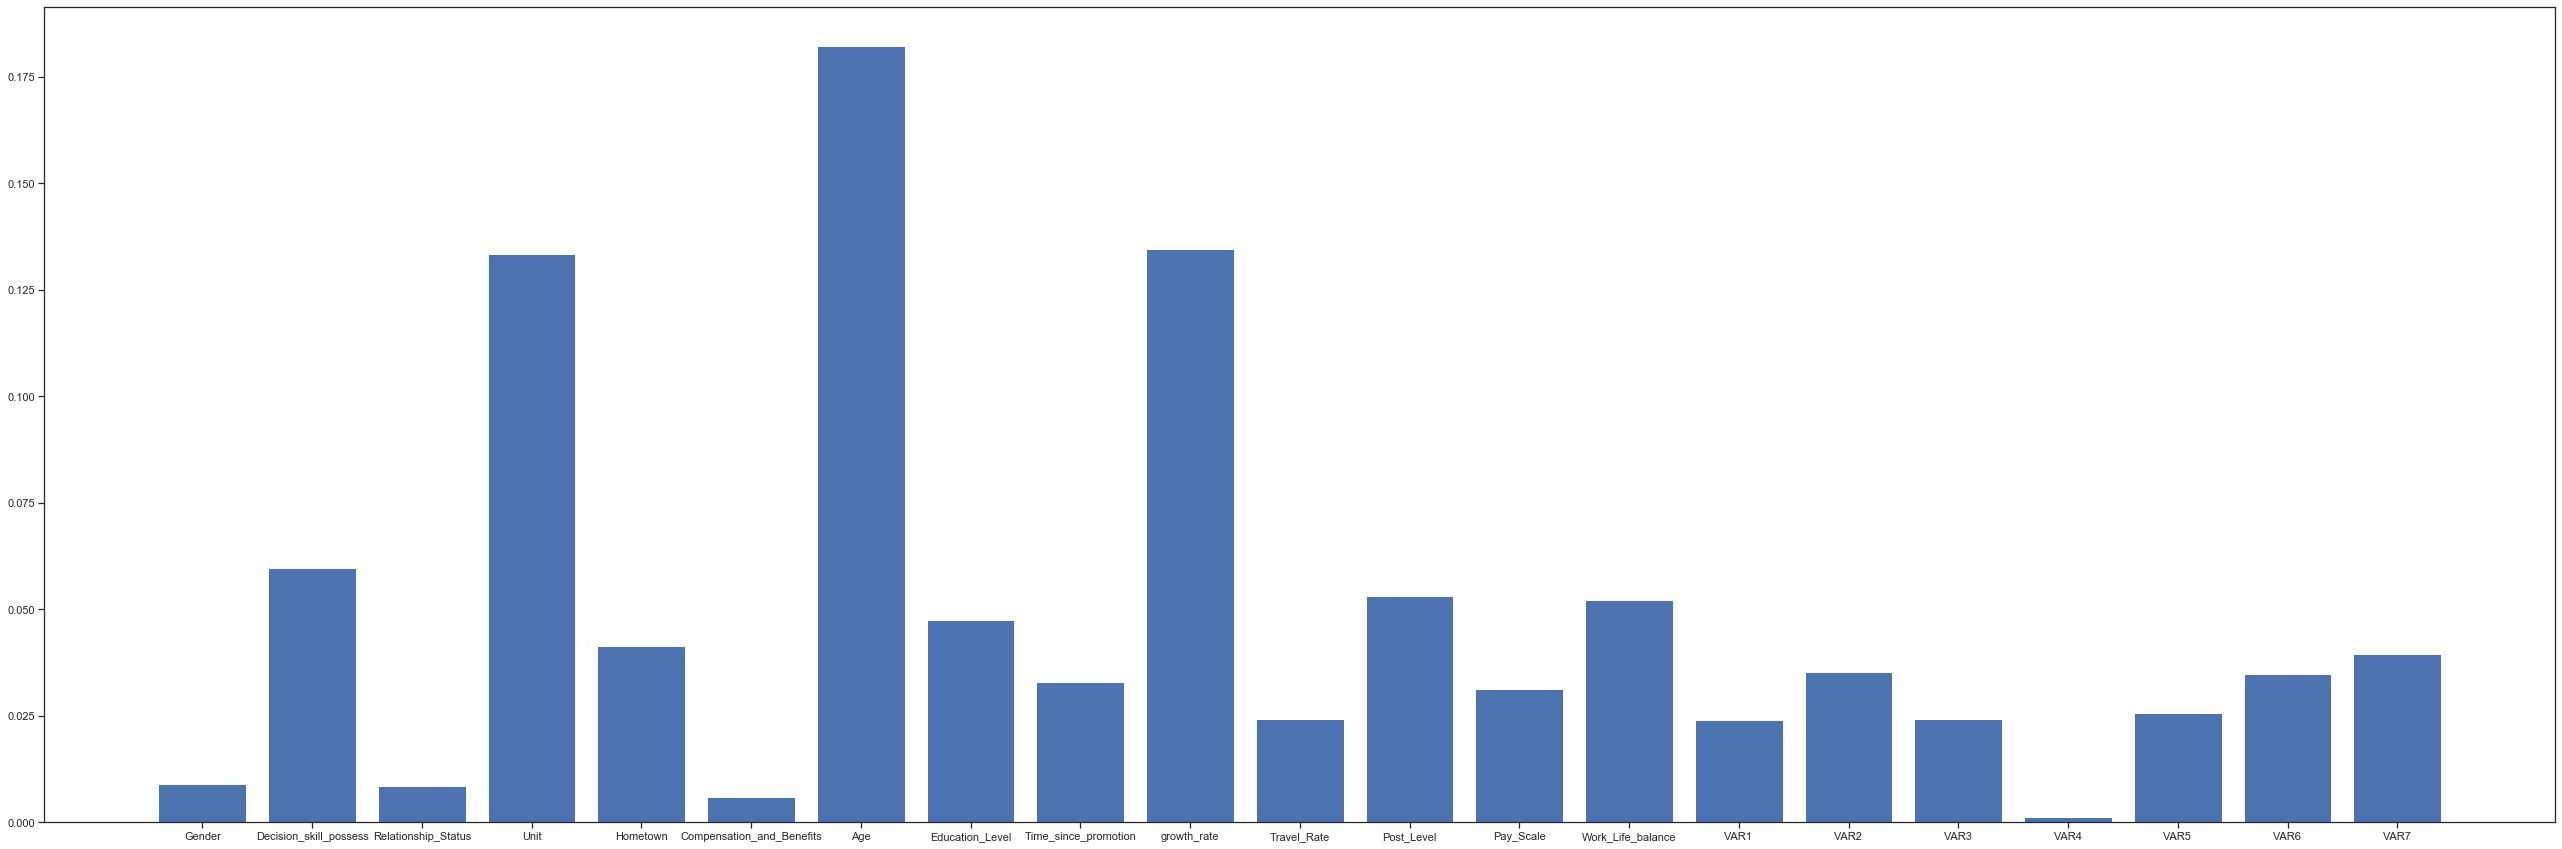

In [67]:
# Checking feature importance given by model
importanc = rfr.feature_importances_
for i,v in enumerate(importanc):
    print('Feature-name: {}, Score:{}'.format(X_train.columns[i],v))
    print('--------------------------------------------------')
# plot feature importance
plt.figure(figsize = (45,15))
plt.bar(X_train.columns, importanc)
plt.show()

In [68]:
def save_decision_trees_as_png(clf, iteration, feature_name, target_name):
    file_name = "iris_" + str(iteration) + ".png"
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=feature_name,
        class_names=target_name,
        rounded=True,
        proportion=False,
        precision=2,
        filled=True,
    )
    graph = pydotplus.graph_from_dot_data(dot_data)
    filename = 'tree.png'
    graph.write_png(filename)
    print("Decision Tree {} saved as png file".format(iteration + 1))

In [69]:
for i in range(len(rfr.estimators_)):
    save_decision_trees_as_png(rfr.estimators_[i], i, X_train.columns, y_train.values)

Decision Tree 1 saved as png file
Decision Tree 2 saved as png file
Decision Tree 3 saved as png file
Decision Tree 4 saved as png file
Decision Tree 5 saved as png file
Decision Tree 6 saved as png file
Decision Tree 7 saved as png file
Decision Tree 8 saved as png file
Decision Tree 9 saved as png file
Decision Tree 10 saved as png file
Decision Tree 11 saved as png file
Decision Tree 12 saved as png file
Decision Tree 13 saved as png file
Decision Tree 14 saved as png file
Decision Tree 15 saved as png file
Decision Tree 16 saved as png file
Decision Tree 17 saved as png file
Decision Tree 18 saved as png file
Decision Tree 19 saved as png file
Decision Tree 20 saved as png file
Decision Tree 21 saved as png file
Decision Tree 22 saved as png file
Decision Tree 23 saved as png file
Decision Tree 24 saved as png file
Decision Tree 25 saved as png file
Decision Tree 26 saved as png file
Decision Tree 27 saved as png file
Decision Tree 28 saved as png file
Decision Tree 29 saved as png

In [70]:
images = [ Image.open(f) for f in glob(r'C:\Users\admin\tree.png') ]

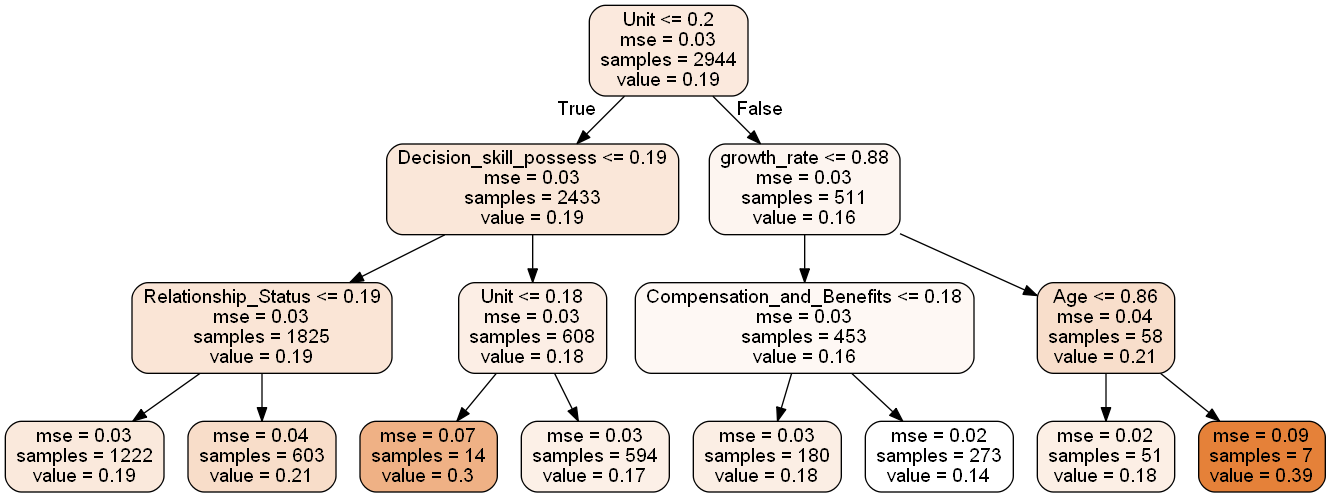

In [71]:
from IPython.display import Image
Image(filename='tree.png') 

<h4>3.4 Applying xgboost

In [72]:
def xgbr_model( X, y):
    # Perform Grid-Search
    gsc = GridSearchCV(estimator=XGBRegressor(),param_grid = dict(max_depth=[2, 4, 6, 8], n_estimators=[50, 100, 150, 200]),cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    rfr = XGBRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
    scores = cross_val_score(rfr, X, y, cv=5, scoring='neg_mean_absolute_error')
    return best_params

In [73]:
xgbr_model(X_train,y_train)

C:\Python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:56:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Python\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python\lib\site-packages\xgboost\sklearn.py", line 396, in fit
    callbacks=callbacks)
  File "C:\Python\lib\site-packages\xgboost\training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "C:\Python\lib\site-packages\xgboost\training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Python\lib\site-packages\xgboost\core.py", line 1109, in update
    dtrain.handle))
  File "C:\Python\lib\site-packages\xgboost\core.py", line 176, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: Invalid Param

{'max_depth': 2, 'n_estimators': 50}

In [74]:
# Fitting data on model and Checking error, score given by model
xgbr = XGBRegressor(max_depth= 2, n_estimators= 50)
xgbr.fit(X_train,y_train)
ypred3 = xgbr.predict(X_test)
error3 = mean_squared_error(y_test, ypred3)
score3 = 100 * max(0, 1-error3)
scores['XGboost regressor'] = score3
print('error for random forest is-',error3)
print('score for random forest is -',score3)

[09:56:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
error for random forest is- 0.03365398967170019
score for random forest is - 96.63460103282998


Feature-name: Gender, Score:0.04606535658240318
--------------------------------------------------
Feature-name: Decision_skill_possess, Score:0.06117159128189087
--------------------------------------------------
Feature-name: Relationship_Status, Score:0.043959878385066986
--------------------------------------------------
Feature-name: Unit, Score:0.044271767139434814
--------------------------------------------------
Feature-name: Hometown, Score:0.032356493175029755
--------------------------------------------------
Feature-name: Compensation_and_Benefits, Score:0.031932417303323746
--------------------------------------------------
Feature-name: Age, Score:0.04968293383717537
--------------------------------------------------
Feature-name: Education_Level, Score:0.040303442627191544
--------------------------------------------------
Feature-name: Time_since_promotion, Score:0.10819467157125473
--------------------------------------------------
Feature-name: growth_rate, Score:0.0

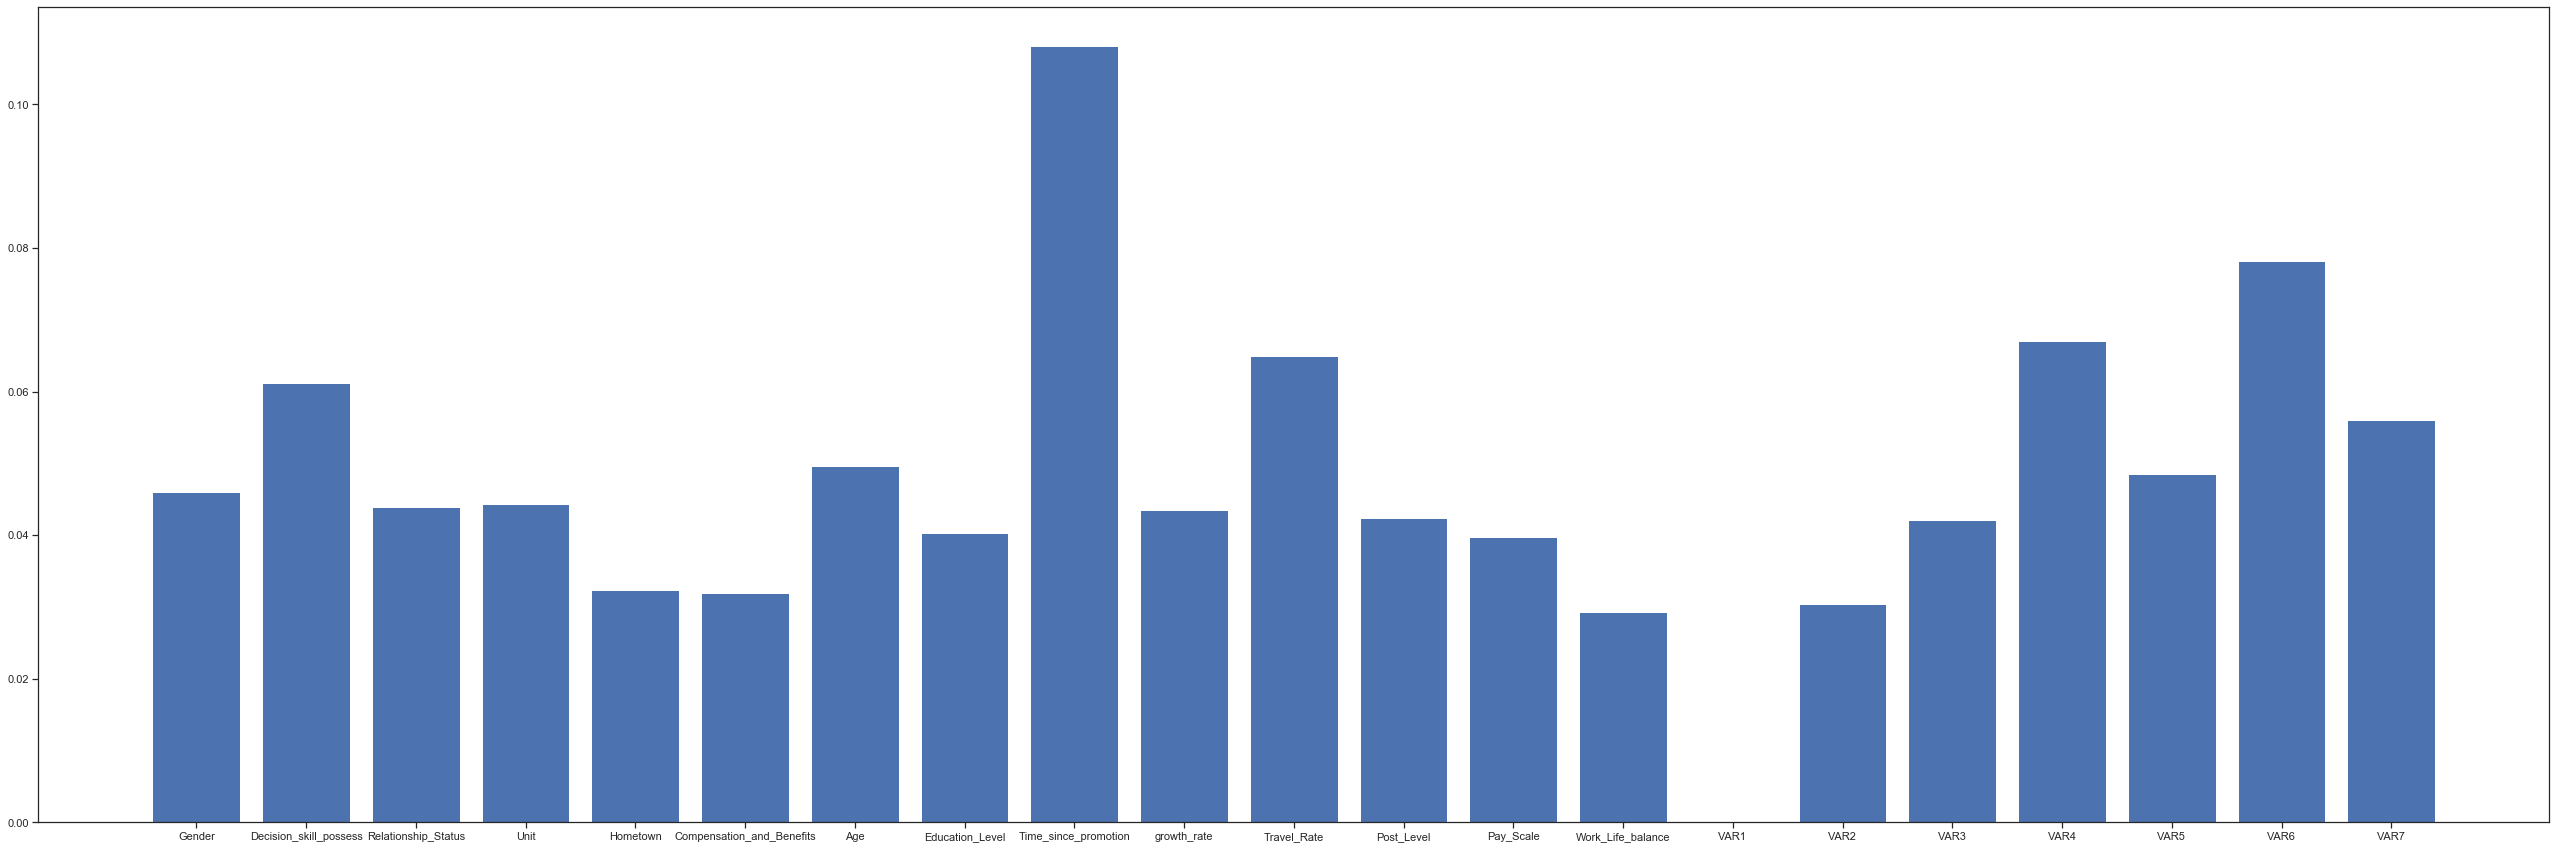

In [75]:
# Checking feature importance given by model
importan = xgbr.feature_importances_
for i,v in enumerate(importan):
    print('Feature-name: {}, Score:{}'.format(X_train.columns[i],v))
    print('--------------------------------------------------')
# plot feature importance
plt.figure(figsize = (45,15))
plt.bar(X_train.columns, importan)
plt.show()

<h4>3.5 Applying adaboost regressor

In [76]:
def adbr_model( X, y):
    param_dist = {'n_estimators': [50, 100],'learning_rate' : [0.01,0.05,0.1,0.3,1],'loss' : ['linear', 'square', 'exponential']}
    pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),param_distributions = param_dist,cv=3,n_iter = 10,n_jobs=-1)
    pre_gs_inst.fit(X_train, y_train)
    return pre_gs_inst.best_params_

In [77]:
adbr_model(X_train, y_train )

{'n_estimators': 50, 'loss': 'linear', 'learning_rate': 0.01}

In [78]:
# Fitting data on model and Checking error, score given by model
adr = AdaBoostRegressor(n_estimators=100, learning_rate=0.01, loss='exponential', random_state=None)
adr.fit(X_train, y_train)
ypred4 = adr.predict(X_test)
error4 = mean_squared_error(y_test, ypred4)
score4 = 100 * max(0, 1-error4)
scores['Adaboost regressor'] = score4
print('error for adaboost is-',error4)
print('score for adaboost is -',score4)

error for adaboost is- 0.033644235191554184
score for adaboost is - 96.63557648084458


Feature-name: Gender, Score:0.010955726381093867
--------------------------------------------------
Feature-name: Decision_skill_possess, Score:0.08193039067910445
--------------------------------------------------
Feature-name: Relationship_Status, Score:0.00329592655365244
--------------------------------------------------
Feature-name: Unit, Score:0.09413459033808455
--------------------------------------------------
Feature-name: Hometown, Score:0.029714207583895865
--------------------------------------------------
Feature-name: Compensation_and_Benefits, Score:0.02399189355158005
--------------------------------------------------
Feature-name: Age, Score:0.15490766663289135
--------------------------------------------------
Feature-name: Education_Level, Score:0.04201182819902457
--------------------------------------------------
Feature-name: Time_since_promotion, Score:0.02799179651128743
--------------------------------------------------
Feature-name: growth_rate, Score:0.1457

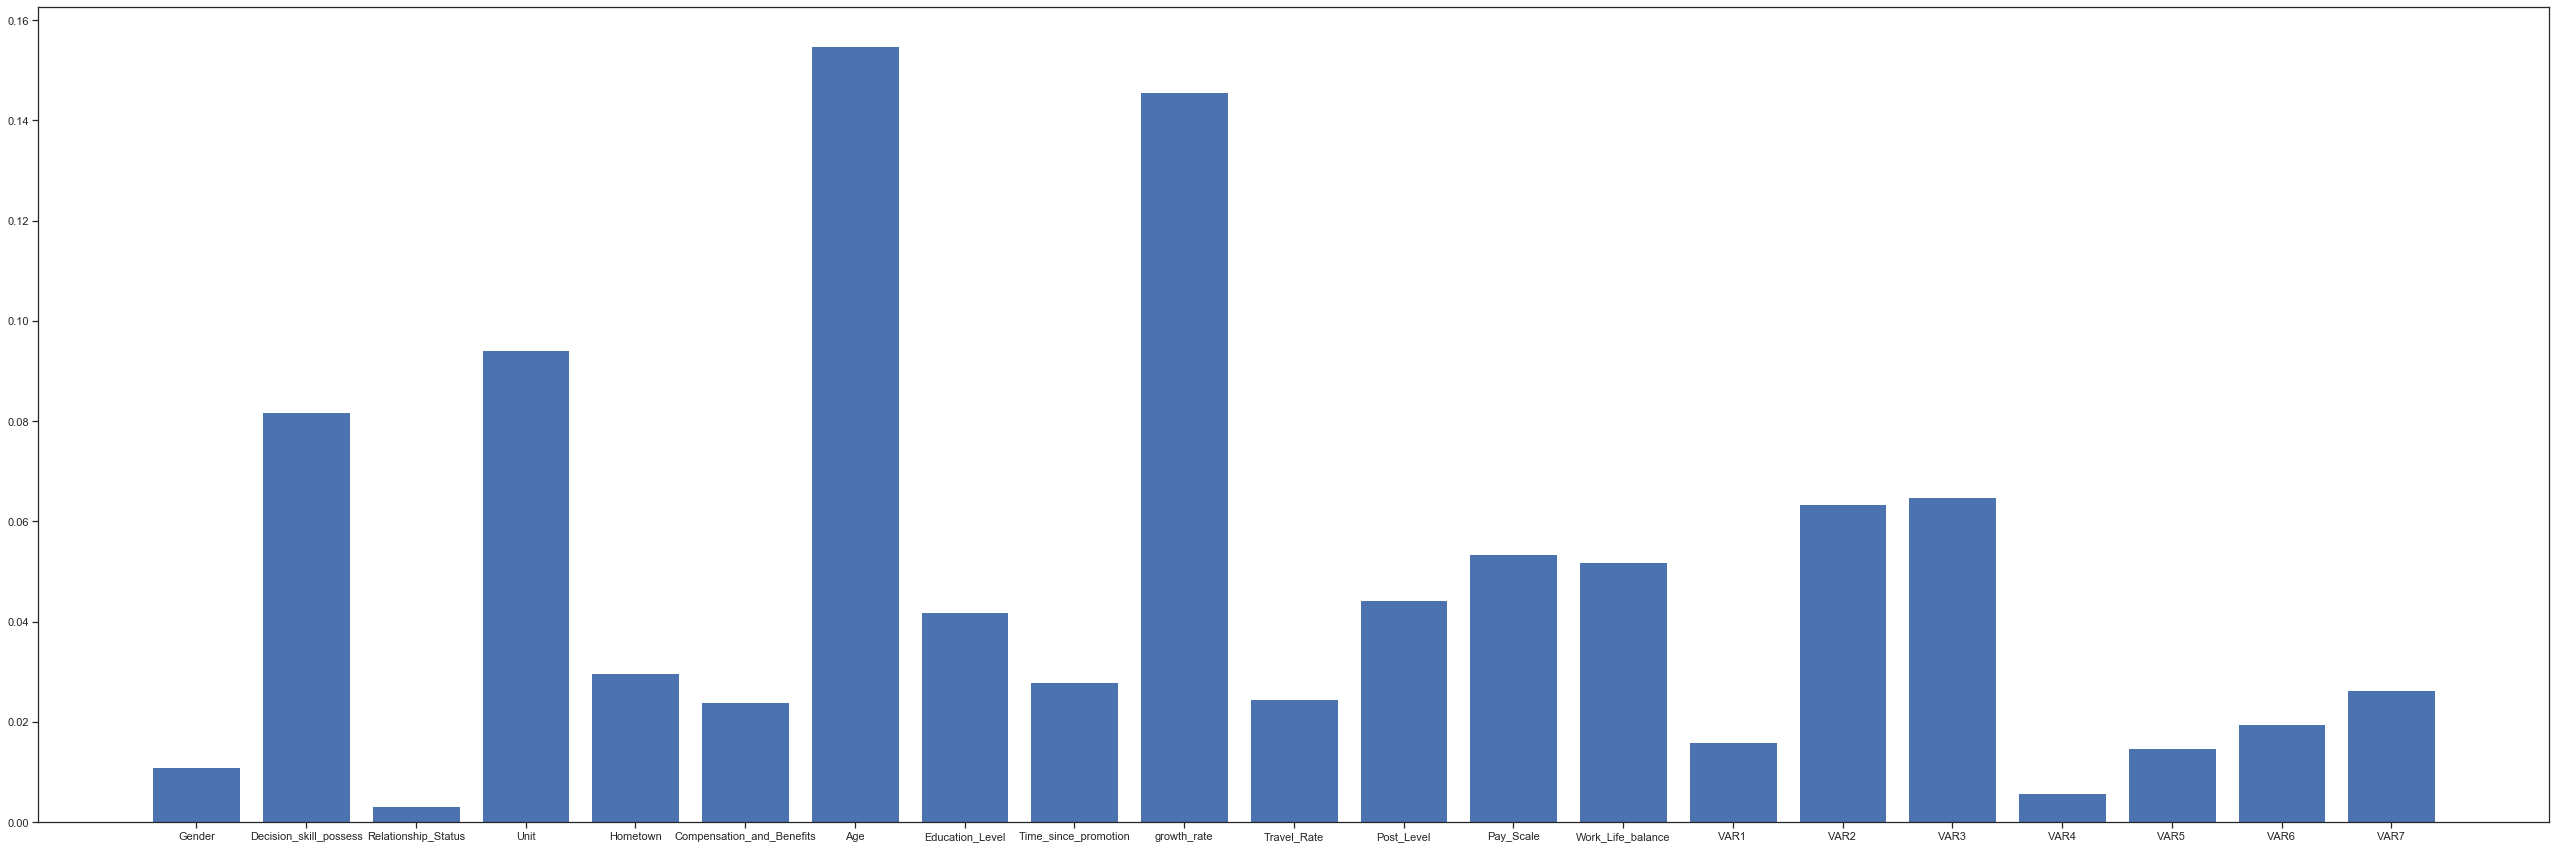

In [79]:
# Checking feature importance given by model
importa = adr.feature_importances_
for i,v in enumerate(importa):
    print('Feature-name: {}, Score:{}'.format(X_train.columns[i],v))
    print('--------------------------------------------------')
# plot feature importance
plt.figure(figsize = (45,15))
plt.bar(X_train.columns, importa)
plt.show()

In [80]:
def light_model( X, y):
    lightgbm_params ={'learning_rate':[0.0001, 0.001, 0.003, 0.01, 0.1],
                  'n_estimators':[10,20, 50, 100],
                 'max_depth':[4, 6, 10, 15, 20, 50]}
    gbm = lgb.LGBMRegressor(random_state = 42)
    clf_gbm = GridSearchCV(gbm, lightgbm_params, cv=5,  scoring='neg_mean_squared_error',n_jobs= -1, verbose = 1)
    clf_gbm.fit(X, y)
    return (clf_gbm.best_estimator_)
    return (clf_gbm.best_score_)

In [81]:
light_model(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    8.4s


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   11.2s finished


LGBMRegressor(learning_rate=0.01, max_depth=10, n_estimators=10,
              random_state=42)

In [82]:
# Fitting data on model and Checking error, score given by model
lgbmr = lgb.LGBMRegressor(max_depth= 6, learning_rate=0.01, n_estimators=10,random_state=42, n_jobs=- 1)
lgbmr.fit(X_train, y_train)
ypred6 = lgbmr.predict(X_test)
error6 = mean_squared_error(y_test, ypred6)
score6 = 100 * max(0, 1-error6)
scores['LGBM regressor'] = score6
print('error for adaboost is-',error6)
print('score for adaboost is -',score6)

error for adaboost is- 0.03333069107931212
score for adaboost is - 96.66693089206879


Feature-name: Gender, Score:6
--------------------------------------------------
Feature-name: Decision_skill_possess, Score:26
--------------------------------------------------
Feature-name: Relationship_Status, Score:14
--------------------------------------------------
Feature-name: Unit, Score:17
--------------------------------------------------
Feature-name: Hometown, Score:15
--------------------------------------------------
Feature-name: Compensation_and_Benefits, Score:10
--------------------------------------------------
Feature-name: Age, Score:46
--------------------------------------------------
Feature-name: Education_Level, Score:16
--------------------------------------------------
Feature-name: Time_since_promotion, Score:6
--------------------------------------------------
Feature-name: growth_rate, Score:49
--------------------------------------------------
Feature-name: Travel_Rate, Score:3
--------------------------------------------------
Feature-name: Post_Leve

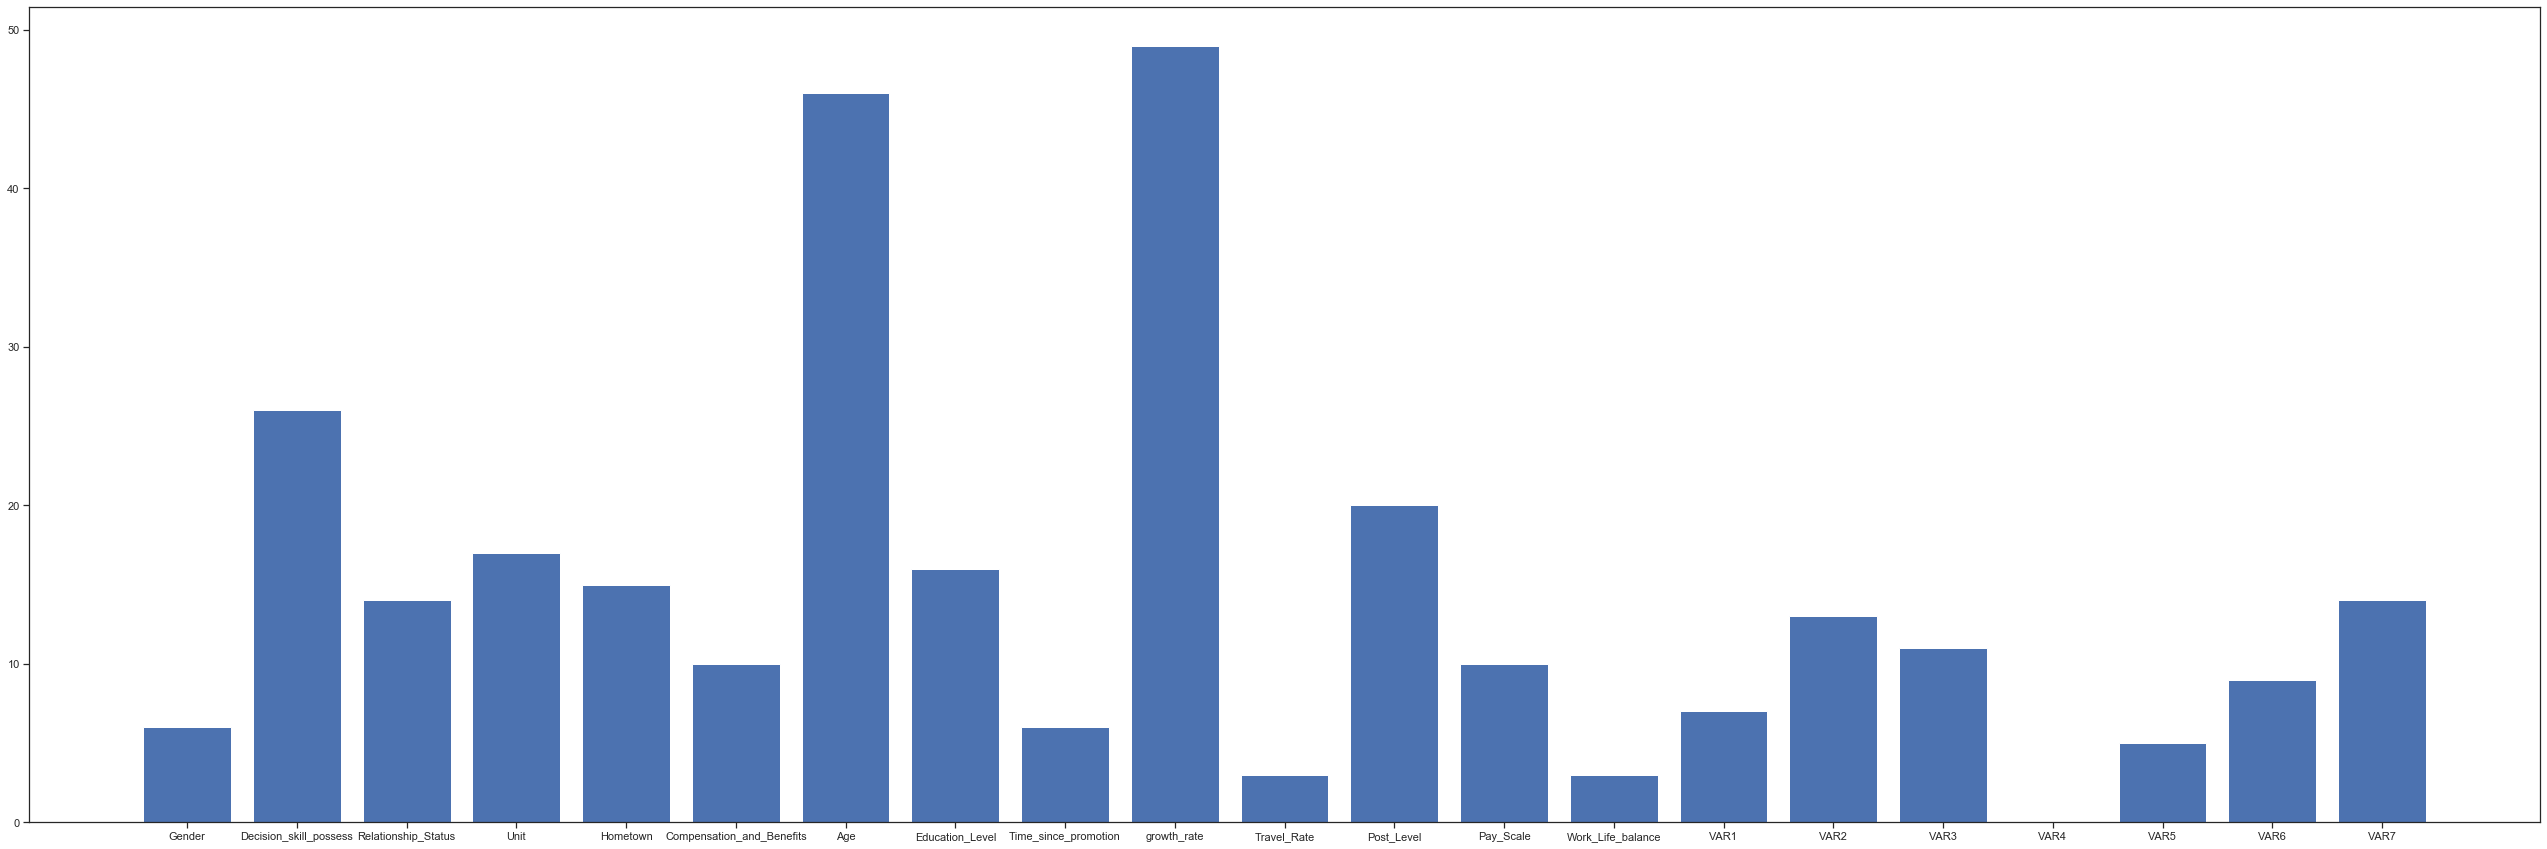

In [83]:
# Checking feature importance given by model
impor = lgbmr.feature_importances_
for i,v in enumerate(impor):
    print('Feature-name: {}, Score:{}'.format(X_train.columns[i],v))
    print('--------------------------------------------------')
# plot feature importance
plt.figure(figsize = (45,15))
plt.bar(X_train.columns, impor)
plt.show()

<h4>3.6 Applying MLP

In [87]:
def mlp_model( X, y):
    mlp = MLPRegressor(max_iter=100)
    parameter_space = {'hidden_layer_sizes': [(512,348,1), (50,100,50), (100,)],'activation': ['tanh', 'relu'],'solver': ['sgd', 'adam'],'alpha': [0.0001, 0.05],}
    clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
    clf.fit(X_train, y_train)
    return clf.best_params_

In [88]:
mlp_model( X_train, y_train)

{'activation': 'tanh',
 'alpha': 0.05,
 'hidden_layer_sizes': (512, 348, 1),
 'solver': 'adam'}

In [91]:
mlpr = MLPRegressor(hidden_layer_sizes=(512,348,1 ), activation='tanh', solver='adam', alpha=0.05, batch_size= 50, learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
mlpr.fit(X_train, y_train)
ypred5 = mlpr.predict(X_test)
error5 = mean_squared_error(y_test, ypred5)
score5 = 100 * max(0, 1-error5)
scores['MLP Regressor'] = score5
print('error for MLPregressor is-',error5)
print('score for MLPregressor is -',score5)

error for MLPregressor is- 0.03335709054650183
score for MLPregressor is - 96.66429094534982


In [92]:
result = pd.DataFrame([])
result['model'] = list(scores.keys())
result['score'] = list(scores.values())
result = result.sort_values(['score'], ascending=False)
result.head()

,model,score
5,LGBM regressor,96.666931
6,MLP Regressor,96.664291
2,Randomforest regressor,96.645184
0,linear regression,96.636088
4,Adaboost regressor,96.635576


Observation - 
1. All the models have similar scores.
2. Randomforests regressor gives more insights of it's working.
3. MLP regressor is a blackbox, therefore cant trust it.